# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib для будущих графиков
import pandas as pd # импортируем библиотеку pandas 
import numpy as np # импортируем библиотеку numpy
from IPython.display import display # импортируем библиотеку display для вывода таблиц
data = pd.read_csv('/datasets/real_estate_data.csv') # создадим переменную data
print(data.head(10)) # выведем первые 10 строк датафрейма


  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

<div class="alert alert-info">
    
При выведении данных обнаруживаем, что все данные склеились по **"\\"** и располагаются в одной колонке. \
    Первым делом произведем разделение.

</div>

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # применим sep и разделим склейку
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-info">
    
После применения разделения, данные выглядят более корректно. Всего 22 колонки.
- `total_images` — число фотографий квартиры в объявлении 
- `last_price` — цена на момент снятия с публикации
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `first_day_exposition` — дата публикации
- `rooms` — число комнат
- `ceiling_height` — высота потолков (м)
- `floors_total` — всего этажей в доме
- `living_area` — жилая площадь в квадратных метрах (м²)
- `floor` — этаж
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `balcony` — число балконов
- `locality_name` — название населённого пункта
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

</div>

In [3]:
data.info() # выведем основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info">
    
Отобразили основную информацию о датафрейме. Мы имеем **23699** строк, у части колонок имеются пропуски, к примеру столбец `floor` имеет целочисленное значение, а `floor_total` значение с запятой, колонка `cityCenters_nearest` имеет заглавную букву в названии, две колонки с булевым значением. В дальнейшем, эти колонки проверим и скорректируем. 

</div>

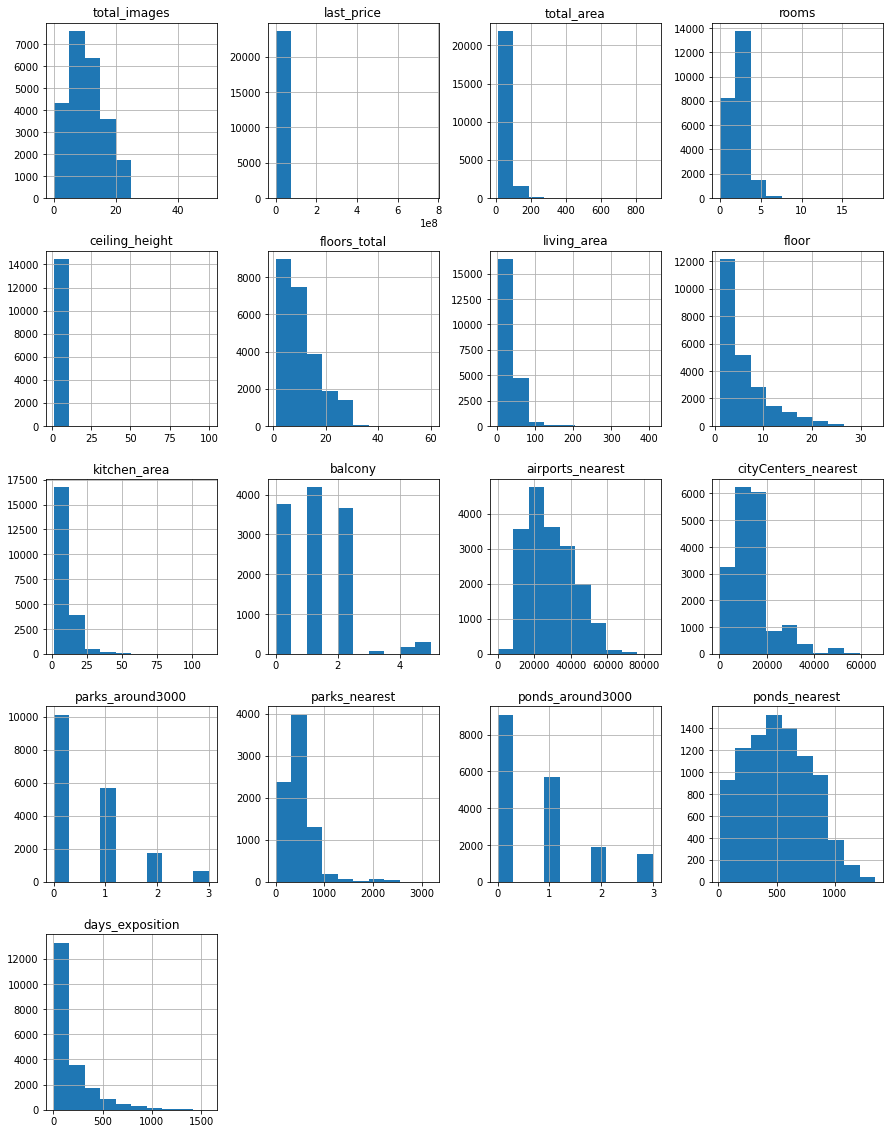

In [4]:
data.hist(figsize=(15, 20)) # методом hist выведем гистограммы по каждой колонке 
plt.show()


<div class="alert alert-info">
    
Методом **hist** вывели гистограммы по всем колонкам для первичного ознакомления.  
Колонки `last_price`, `total_area`, `ceiling_height` отображаются не информативно, на остальных прослеживается зависимость. 
</div>

In [5]:
data.duplicated().sum() # методом duplicated проверим наличее полных дубликатов

0

<div class="alert alert-info">
    
Полных дубликатов строк не обнаружено.
    
</div>

### Предобработка данных

In [6]:
data.isna().sum() # методом isna проверим наличие пропусков во всех колонках

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-info">
    
Только **8** из **22** колонок не имеют пропусков. Разберем каждую колонку отдельно на предмет замены пропуска. 
    
</div>

#### Замена названия колонки

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',})


<div class="alert alert-info">
    
Методом **rename** переименовали колонку `cityCenters_nearest` в `city_centers_nearest` разделив склейку и заменив заглавную на строчную букву. 
</div>

#### Число фотографий квартиры в объявлении

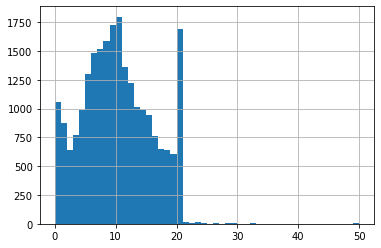

In [8]:
data['total_images'].hist(bins=50)
plt.show()

<div class="alert alert-info">
    
Построем гистограмму по количеству фотографий в объявлениях. Выделяется пик в районе **10** фотографий. Нулевые значения так же присутствуют.  
    
</div>

In [9]:
data['total_images'].describe() 

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

<div class="alert alert-info">
    
Посмотрим на объщую информацию о количестве фотографий. Как и отмечали ранее медиана в районе **9** фотографий, максимальное значение **50**. 

</div>

#### Цена на момент снятия с публикации

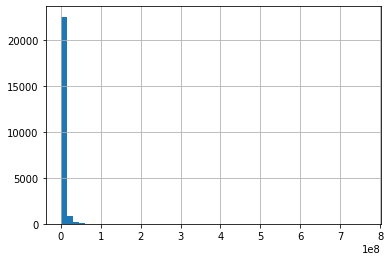

In [10]:
data['last_price'].hist(bins=50)
plt.show()

<div class="alert alert-info">
    
 Посмотрим на гистограмму цены. Она не информативна. 

</div>

In [11]:
data['last_price'].head(10)

0    13000000.0
1     3350000.0
2     5196000.0
3    64900000.0
4    10000000.0
5     2890000.0
6     3700000.0
7     7915000.0
8     2900000.0
9     5400000.0
Name: last_price, dtype: float64

<div class="alert alert-info">
    
Посмотрим на первые строки. Пока все логично выглядет.  

</div>

In [12]:
data['last_price'].sort_values(ascending= False)

12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
            ...     
16219       450000.0
16274       440000.0
17456       430000.0
14911       430000.0
8793         12190.0
Name: last_price, Length: 23699, dtype: float64

<div class="alert alert-info">
    
Отсортируем по убыванию. Цена в **450 000** кажется не реальной.  

</div>

In [13]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<div class="alert alert-info">
    
Медиана в районе **4,6** миллионов рублей, максимум **763 000 000**, это реалии рынка недвижимости, а вот минимум в **12 190** рублей явно аномальное значение. 

</div>

In [14]:
data[data['last_price']<500000].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,...,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
6859,6,490000.0,40.0,2017-12-11T00:00:00,1,NaN,5.0,NaN,3,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,...,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10782,3,490000.0,29.1,2016-05-05T00:00:00,1,2.50,5.0,17.0,5,NaN,...,5.5,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0


<div class="alert alert-info">
    
Просматривая данные по квартирам дешевле **500 000** рублей, не выеялено отчетливой зависимости от других параметров, с большой долей вероятности это аномалии, а квартира за **12 190** рублей явная анамалия. От них в дальнейшем проще будет избавиться. 

</div>

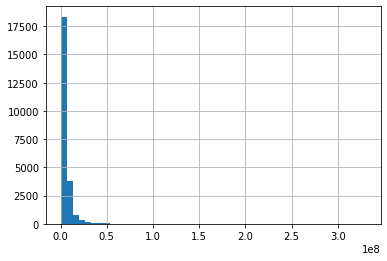

In [15]:
last_price_filter = data.query('last_price > 500000 and last_price < 400000000')
last_price_filter['last_price'].hist(bins=50)
plt.show()


<div class="alert alert-info">

Создадим переменную `last_price_filter` в которую запишем данные колонки `last_price` без аномальных значений.
    
</div>

#### Общая площадь квартиры в квадратных метрах (м²)

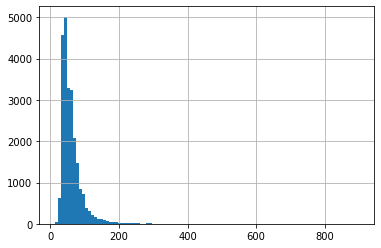

In [16]:
data['total_area'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Просматривая данные по общей площади квартир.Отчетливый пик в начале говорит о привалирующем объеме квартир не больших. Пока все выглядит логично.  

</div>

In [17]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<div class="alert alert-info">
    
Медиана в районе **52** метров, минимальное значение **12** метров (бываю квартиры и по 8), максимум **900** метров (очень просторная, но не запредельная). 

</div>

#### Дата публикации

In [18]:
data['first_day_exposition'].head(10)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object

<div class="alert alert-info">
    
Ознакомимся с данными в колонке с датой публикации. Колонка в формате `object` ее необходимо перевести в формат `datetime`.  
    
</div>

In [19]:
data['first_day_exposition'] = \
pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
              )
data['first_day_exposition'].head(5)


0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

<div class="alert alert-info">
    
Формат изминили и теперь с колонкой можно производить операции. 
    
</div>

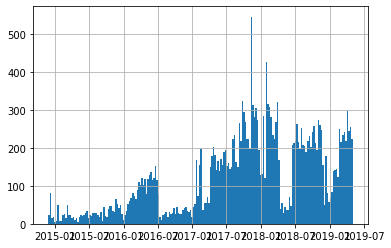

In [20]:
data['first_day_exposition'].hist(bins=200)
plt.show()

<div class="alert alert-info">
    
На гистограмме заметно колебания рынка недвижимосте. Интересен провал в первой половине **2017** года, далее наблюдаем оживление и новый провал осенью **2018** и летом **2019** года.  
    
</div>

#### Число комнат

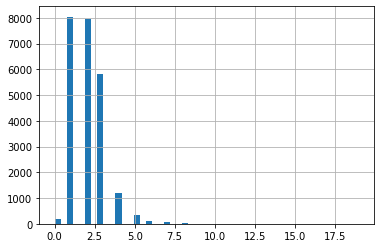

In [21]:
data['rooms'].hist(bins=50)
plt.show()

<div class="alert alert-info">
    
Посмотрим на гистограмму отображающую количество комнат.  
    
</div>

In [22]:
data.groupby('rooms')['rooms'].agg('count')

rooms
0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

<div class="alert alert-info">
    
Посмотрим на сгруппированные данные по количеству комнат. Значение **0** возможно относится к типу `studio`, если нет то скорее всего это аномалия. Значения **7+** тоже кажутся аномальными значениями, их можно посмотреть в контексте с объщей площадью квартиры.   
    
</div>

In [23]:
data[data['rooms']==0].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18.0,NaN,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.00,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.00,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


<div class="alert alert-info">
    
По данным видим, что нет зависимости от типа квартиры, но видим, что общая площадь не большая и с большой долей вероятности эти квартиры можно отнести к категории **однокомнатных**.    
    
</div>

In [24]:
data[data['rooms']>9].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,NaN,...,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,NaN,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,NaN,...,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,NaN,...,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,NaN,...,19.8,0.0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,NaN,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,NaN,...,30.0,1.0,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


<div class="alert alert-info">
    
При изучении анамально большого количества комнат, прослеживается зависимость от общей площади квартиры, цены квартиры, потолки тоже высокие. Можно сделать вывод, что это не ошибка. 
    
</div>

In [25]:
data[data['rooms']>9].count().sum()

213

<div class="alert alert-info">
    
Количество квартир в которых больше **9** комнат, **313**. Не смотря на то что это не явная аномалия, это категория элитного жилья и большое количество комнат может быть обусловлено такими помещениями как кладовая, прачка, гардеробная, серверная и тд. Доля такой элитки от общего объема квартир порядка **1,5%**, примем их за выбросы и исключим из выборки.  
    
</div>

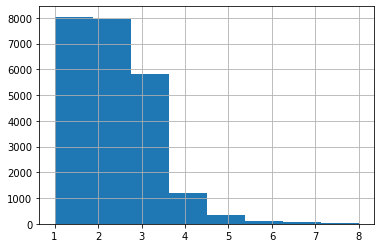

In [26]:
rooms_filter = data.query('rooms >=1 and rooms < 9')
rooms_filter['rooms'].hist(bins=8)
plt.show()

<div class="alert alert-info">
    
Создадим переменную `rooms_filter` в которую запишем значения колонки `rooms` без аномальных значений.
    
</div>

#### Высота потолков

In [27]:
print('Высота потолков не указана в {:.2%} случаях'.format(data['ceiling_height'].isna().mean()))

Высота потолков не указана в 38.80% случаях


<div class="alert alert-info">
    
Высота потолков не указана в **38,80%** случаях.
    
</div>

In [28]:
ceiling_height_medians = data['ceiling_height'].median()
print(ceiling_height_medians)

2.65


In [29]:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_medians)

<div class="alert alert-info">
    
Вывели ***медианное значение***, а далее применили его для замены пропусков.
    
</div>

In [30]:
data['ceiling_height'].sort_values(ascending= False) # сортируем данные по убыванию

22869    100.00
3148      32.00
22336     32.00
21377     27.50
4876      27.00
          ...  
2572       2.00
22960      2.00
16934      1.75
5712       1.20
22590      1.00
Name: ceiling_height, Length: 23699, dtype: float64

<div class="alert alert-info">
    
Отсортировали данные по убыванию. Разброс очень большой. 

</div>

In [31]:
data['ceiling_height'].unique() # посмотрим уникальные значения

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

<div class="alert alert-info">
    
Колонка с указанием высоты потолков имеет **183** уникальных значения ***(в пределах от 1 до 100)***, что является аномальным. Разброс данных даже по сотым долям. Крупные значения, такие как **24, 26, 27, 32 и 35** скорее всего указаны в децеметрах. 

</div>

In [32]:
def ceiling (x): # создадим функцию которая переведет аномальные значения из децеметра в метр
    if x >= 6.0:
        return x/10.0
    return x
data['ceiling_height'] = data['ceiling_height'].apply(ceiling)
print(data['ceiling_height'].unique())

[ 2.7   2.65  3.03  2.5   2.67  2.56  3.05  2.75  2.6   2.9   2.8   2.55
  3.    3.2   2.61  3.25  3.45  2.77  2.85  2.64  2.57  4.15  3.5   3.3
  2.71  4.    2.47  2.73  2.84  3.1   2.34  3.4   3.06  2.72  2.54  2.51
  2.78  2.76  2.58  3.7   2.52  5.2   2.87  2.66  2.59  2.    2.45  3.6
  2.92  3.11  3.13  3.8   3.15  3.55  3.16  3.62  3.12  2.53  2.74  2.96
  2.46  5.3   5.    2.79  2.95  4.06  2.94  3.82  3.54  3.53  2.83  4.7
  2.4   3.38  3.01  5.6   3.65  3.9   3.18  3.35  2.3   3.57  2.48  2.62
  2.82  3.98  2.63  3.83  3.52  3.95  3.75  2.88  3.67  3.87  3.66  3.85
  3.86  4.19  3.24  4.8   4.5   4.2   3.36  3.08  3.68  3.07  3.37  3.09
  0.8   3.26  3.34  2.81  3.44  2.97  3.14  4.37  2.68  3.22  3.27  4.1
  2.93  3.46  3.47  3.33  3.63  3.32  1.2   0.83  2.98  2.86  3.17  4.4
  3.28  3.04  4.45  5.5   3.84  3.23  3.02  3.21  3.43  3.78  4.3   3.39
  2.69  3.31  4.65  3.56  2.2   3.51  3.93  3.42  2.99  3.49  1.4   4.14
  2.91  3.88  1.75  4.25  3.29  2.25  3.76  3.69  0.6   

<div class="alert alert-info">
    
Создали и применили функцию которая принимая аномально высокое значение, переводит его из децеметра в метр.  

</div>

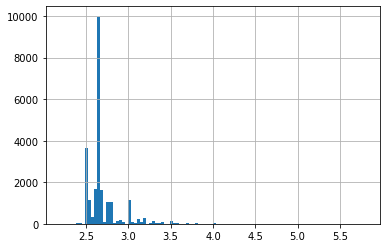

In [33]:
ceiling_height_filter = data.query('ceiling_height > 2 and ceiling_height < 6')
ceiling_height_filter['ceiling_height'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Создали переменную `ceiling_height_filter` в которую методом `query` записали выборку значений высоты потолков больше **2** и меньше **6** метров.
    
</div>

In [34]:
ceiling_height_filter['ceiling_height'].describe()

count    23676.000000
mean         2.697095
std          0.219631
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

<div class="alert alert-info">
    
Вывели сводную информацию по колонке. Медиана равна **2,65** метра. Среднее и медианное значение с минимальной погрешностью.  

</div>

#### Количество этажей в доме


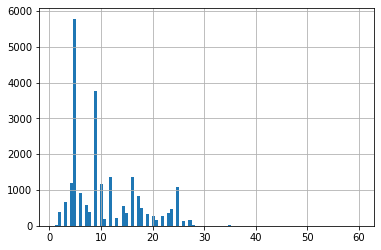

In [35]:
data['floors_total'].hist(bins=100) # построим гистограмму
plt.show()

<div class="alert alert-info">
    
На графике видны пиковые значения в районе **5 и 9** этажных зданий, далее пики на **17 и 25** этажных, всё выглядит логично, но есть аномалии на **36, 37, 52 и 60** этажах.  

</div>

In [36]:
data['floors_total'].isna().sum()

86

<div class="alert alert-info">
  
Обнаружили **86** пропусков.

</div>

In [37]:
#data['floors_total'] = data['floors_total'].fillna(0) # заменим пропуски на 0
data['floors_total'] = data['floors_total'].dropna()
print(data['floors_total'].unique())


[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]


<div class="alert alert-info">
    
Так как пропусков очень мало **(0,3%)** просто удалим их.
    
</div>

In [38]:
data['floors_total'].isna().sum()

86

<div class="alert alert-info">
    
От пропусков избавились.  

</div>

In [39]:
data.groupby('floors_total')['floors_total'].agg('count') # сгруппируем данные по этажам

floors_total
1.0       25
2.0      383
3.0      668
4.0     1200
5.0     5788
6.0      914
7.0      592
8.0      390
9.0     3761
10.0    1174
11.0     203
12.0    1362
13.0     229
14.0     553
15.0     365
16.0    1376
17.0     833
18.0     505
19.0     339
20.0     271
21.0     158
22.0     286
23.0     352
24.0     469
25.0    1075
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64

<div class="alert alert-info">
    
Сгруппировали данные по этажам. Видим несколько аномально высоких значений **(29+)**. Их очень мало, менее **0,2%**, от них можно избавимся.  

</div>

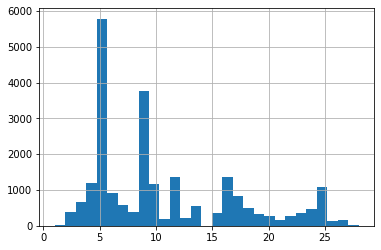

In [40]:
floors_total_filter = data.query('floors_total < 29')
floors_total_filter['floors_total'].hist(bins=29)
plt.show()

<div class="alert alert-info">
    
Создадим переменную `floors_total_filter` в которую запишем значения `floors_total` без аномально высоких значений.
    
</div>

In [41]:
floors_total_filter['floors_total'].describe()

count    23580.000000
mean        10.638168
std          6.529542
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64

<div class="alert alert-info">
    
Медианное значение расположилось в районе **9 этажей**.  

</div>

#### Жилая площадь

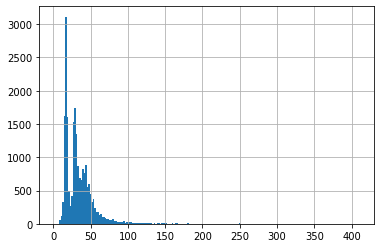

In [42]:
data['living_area'].hist(bins=200)
plt.show()

<div class="alert alert-info">
    
Выведем гистограмму по колонке жилая площадь. Отчетливо выделяются два пика.  

</div>

In [43]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<div class="alert alert-info">
    
Вывели общую информацию по колонке. Медиана располажилась в районе **30** метров, минимальное значение **2** (***является аномальным значением***)  

</div>

In [44]:
print(data[data['living_area'] <= 10]['living_area'].count())
print(data[data['living_area'] <= 15]['living_area'].count())
print(data[data['living_area'] >= 200]['living_area'].count())

58
1018
33


<div class="alert alert-info">
    
Посчитали количество квартир с площадью менее **10** метров, их количество четверть процента от общего числа. Этой анамалией можно пожертвовать без сожаления. А вот **15** метровые квартиры, это уже реальность, их порядка **5%**. квартир с площадью более **200** метров всего **0,2%**, это выбросы от которых можно избавиться. 

</div>


In [45]:
data['living_area'].isna().sum()

1903

In [46]:
print(data['living_area'].head(10))

0    51.00
1    18.60
2    34.30
3      NaN
4    32.00
5    14.40
6    10.60
7      NaN
8    15.43
9    43.60
Name: living_area, dtype: float64


<div class="alert alert-info">
    
Выявили **1903** пропущенных значения. Заменим их на коэффициент соотношения жилой и общей площади.  

</div>

In [47]:
area_proportion = data['living_area']/data['total_area']
area_proportion_medians = area_proportion.median()
print(area_proportion_medians)

0.5678598992678503


<div class="alert alert-info">
    
Создадим переменную `area_proportion` в которой посчитаем коэффициент отношения жилой и общей площади в каждом случае. Далее выведим **медианное значение** коэффициента и запишем его в новую переменную `area_proportion_medians`.
    
</div>

In [48]:
data['living_area'] = data['living_area'].fillna(area_proportion_medians * data['total_area'])
print(data['living_area'].head(10))

0    51.000000
1    18.600000
2    34.300000
3    90.289724
4    32.000000
5    14.400000
6    10.600000
7    40.658769
8    15.430000
9    43.600000
Name: living_area, dtype: float64


<div class="alert alert-info">
    
Заменим пропуски применив медианное значение к общей площади.
    
</div>

In [49]:
data['living_area'].isna().sum()

0

<div class="alert alert-info">
    
От пропусков избавились. 

</div>

#### Этаж 

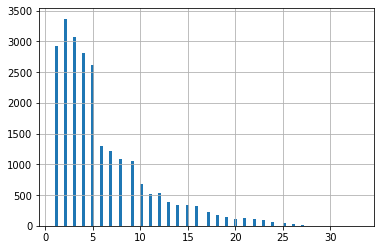

In [50]:
data['floor'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Построем гистограмму по этажам. Отчетливо наблюдаем, что основная масса располажилась в **пятиэтажных** строениях.
    
</div>

In [51]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<div class="alert alert-info">
    
Выведем объщую информацию. Минимум **1**, максимум **33**, медиана **4** этажа. 

</div>

#### Апартаменты 

In [52]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [53]:
data['is_apartment'].sum()

50

<div class="alert alert-info">
    
Колонка с апартаментами содержит **булев тип данных**. 

</div>

In [54]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique()

array([False,  True])

<div class="alert alert-info">
    
Апартаменты это юридический статус типа помещения и оно относится к **не жилому**. Этот параметр очень важен. Если он не указан, то с большой долей вероятности мы имеем дело с обычной **жилой недвижимостью**. Поэтому пропуски заменим на значение `False`, в данном случае это можно сделать. 

</div>

#### Квартира-студия

In [55]:
data['studio'].unique()

array([False,  True])

In [56]:
data['studio'].sum()

149

<div class="alert alert-info">
    
Колонка с обозначением типа как студия содержит **булев тип данных**. 

</div>

#### Свободная планировка 

In [57]:
data['open_plan'].unique()

array([False,  True])

In [58]:
data['open_plan'].sum()

67

<div class="alert alert-info">
    
Колонка с обозначением типа как свободная планировка содержит **булев тип данных**. 

</div>

#### Площадь кухни

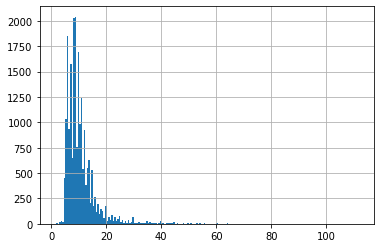

In [59]:
data['kitchen_area'].hist(bins=200)
plt.show()

<div class="alert alert-info">
    
Колонка с площадью кухни показывает пики медианны в районе **10 метров**. 

</div>

In [60]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<div class="alert alert-info">
    
Выведем общую информацию по колонке. Медиана в районе **9** метров, минимальльное значение **1.3** и максимальное **112** явные выбросы которые не будем учитывать в последующей выборке.  

</div>

In [61]:
print(data[data['kitchen_area'] <= 4]['kitchen_area'].count())
print(data[data['kitchen_area'] >= 40]['kitchen_area'].count())

54
156


<div class="alert alert-info">
    
Квартир с площадью кухни менее **4** метров набралось **54**, квартир с площадью больше **40** метров **156**. 
Эти показатели можно считать анамальными
    
</div>

In [62]:
data['kitchen_area'].isna().sum()

2278

<div class="alert alert-info">
    
В колонке **2278** пропусков (чуть больше **10%** от общей массы). 

</div>

In [63]:
data['kitchen_area'].head(10)

0    25.00
1    11.00
2     8.30
3      NaN
4    41.00
5     9.10
6    14.40
7    18.90
8     8.81
9     6.50
Name: kitchen_area, dtype: float64

In [64]:
kitchen_area_proportion = data['kitchen_area']/data['total_area']
kitchen_area_proportion_medians = kitchen_area_proportion.median()
print(kitchen_area_proportion_medians)

0.1724137931034483


<div class="alert alert-info">
    
Создадим переменную `kitchen_area_proportion` в которой посчитаем коэффициент отношения площади кухни и общей площади в каждом случае. Далее выведим **медианное значение** коэффициента и запишем его в новую переменную `kitchen_area_proportion_medians`.
    
</div>

In [65]:
data['kitchen_area'] = data['kitchen_area'].fillna\
(kitchen_area_proportion_medians * data['total_area'])
print(data['kitchen_area'].head(10))

0    25.000000
1    11.000000
2     8.300000
3    27.413793
4    41.000000
5     9.100000
6    14.400000
7    18.900000
8     8.810000
9     6.500000
Name: kitchen_area, dtype: float64


<div class="alert alert-info">
    
Заменим пропуски применив медианное значение к общей площади.
    
</div>

In [66]:
data['kitchen_area'].isna().sum()

0

<div class="alert alert-info">
    
От пропусков избавились. 

</div>

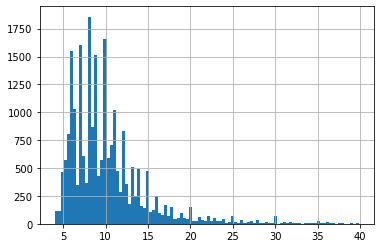

In [67]:
kitchen_area_filter = data.query('kitchen_area > 4 and kitchen_area < 40')
kitchen_area_filter['kitchen_area'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Создадим переменную `kitchen_area_filter` в которую запишем данные колонки `kitchen_area` без аномальных значений.
    
</div>

#### Наличие балкона

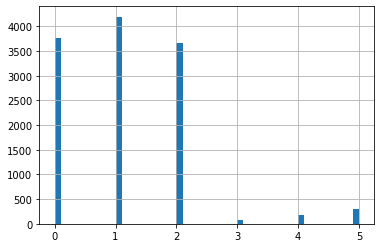

In [68]:
data['balcony'].hist(bins=50)
plt.show()

<div class="alert alert-info">
    
На гистограмме отчетливо выделяются три группы и группа с одним балконом лидирует.
    
</div>

In [69]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

<div class="alert alert-info">
    
Выводим объщую информацию по балконам. Медиана **1**, есть пиковые значения в **5** балконов.
    
</div>

In [70]:
data.groupby('balcony')['balcony'].agg('count')# групируем по количеству балконов

balcony
0.0    3758
1.0    4195
2.0    3659
3.0      81
4.0     183
5.0     304
Name: balcony, dtype: int64

<div class="alert alert-info">
    
Сгрупировали данные по балконам. Наличие **4** и **5** балконов не кажется ошибкой. Необходимо проверить гипотезу, что это частные загородные дома.
    
</div>

In [71]:
data[data['balcony']>=4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.00,2016-05-04,3,2.65,14.0,59.000000,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.80,2015-07-08,4,2.80,4.0,80.900000,2,False,...,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18,10999000.0,97.20,2017-11-13,3,2.50,16.0,55.195982,16,False,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
121,20,33000000.0,180.00,2017-02-17,3,2.90,9.0,86.000000,8,False,...,24.0,4.0,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
250,13,3200000.0,51.70,2019-01-22,2,2.65,16.0,29.200000,5,False,...,7.7,4.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,10,4300000.0,52.00,2019-04-21,1,2.70,16.0,28.000000,8,False,...,11.0,5.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23474,16,5900000.0,40.50,2019-03-16,2,2.73,17.0,31.000000,16,False,...,5.0,4.0,Санкт-Петербург,19901.0,21613.0,0.0,NaN,1.0,1003.0,NaN
23497,17,6150000.0,55.40,2019-04-22,2,2.80,20.0,29.400000,16,False,...,9.6,4.0,Санкт-Петербург,16285.0,13873.0,0.0,NaN,1.0,481.0,NaN
23526,14,5800000.0,60.69,2018-03-13,3,2.50,9.0,39.700000,2,False,...,6.2,5.0,Санкт-Петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0


<div class="alert alert-info">
    
Гипотеза с частным домом не подтвердилась. Есть квартиры в многоэтажных домах с жилой площадью в **30** метров и при этом с **5** балконами. Это наводит на мысли об ошибке или просто указали площадь. Квартир где указано наличие **4 и 5** балконов, всего **2%** от общих данных. Поэтому их в дальнейшем анализе не будим использовать.
    
</div>

In [72]:
data['balcony'].isna().sum()

11519

<div class="alert alert-info">
    
Выявлено **11519** пропусков. Если балкон не указан, с большой долей вероятности его нет, поэтому можно пропуски можно заменить на **0**. 
    
</div>

In [73]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

<div class="alert alert-info">
    
От пропусков избавились.
    
</div>

#### Название населенного пункта

In [74]:
data['locality_name']

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

<div class="alert alert-info">

Вывели колонку с названиями населенных пунктов для первичного просмотра.
    
</div>

In [75]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

<div class="alert alert-info">

Вывели уникальные значения. Видим,  что все города прописаны с большой буквы, а пригород имеет классификатор (деревня, поселок, населенный пункт, село и т.д.). Причем поселок имеет двойное написание, в одних случаях использована буква "**ё**" в других "**е**".
    
</div>

In [76]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') # заменим букву 'ё' на 'е'
data['locality_name'].head(10)

0              Санкт-Петербург
1               поселок Шушары
2              Санкт-Петербург
3              Санкт-Петербург
4              Санкт-Петербург
5    городской поселок Янино-1
6            поселок Парголово
7              Санкт-Петербург
8               поселок Мурино
9              Санкт-Петербург
Name: locality_name, dtype: object

<div class="alert alert-info">

Заменили букву **"ё"** на **"е"**. Теперь перечень отвечает общему стилю
    
</div>

In [77]:
data['locality_name'].isna().sum()

49

<div class="alert alert-info">

Проверка на пропуски показывает **49** значений.
    
</div>

In [78]:
data['locality_name'] = data['locality_name'].dropna()
data['locality_name'].isna().sum()

49

<div class="alert alert-info">

Пропуски удалили, так как их не возможно исплавить и их количество не превышает четверти процента **(0,2%)**.
    
</div>

In [79]:
def title_parse(title):
    res = ' '.join(word for word in title.split(' ') if word.islower())
    return res # создадим функцию которая переберет строку из строчных букв разделенных пробелом
data['locality_type'] = data['locality_name'].fillna('').apply(title_parse) 
# создадим новую колонку с типом населенного пункта
data[['locality_name', 'locality_type']].head(10)

,locality_name,locality_type
0,Санкт-Петербург,
1,поселок Шушары,поселок
2,Санкт-Петербург,
3,Санкт-Петербург,
4,Санкт-Петербург,
5,городской поселок Янино-1,городской поселок
6,поселок Парголово,поселок
7,Санкт-Петербург,
8,поселок Мурино,поселок
9,Санкт-Петербург,


<div class="alert alert-info">

Написали функцию, которая перебирая строку по строчным буквам объединенных пробелом, выводит отдельно название из строчных
 букв до заглавной. Создали отдельную колонку с типом населенного пункта.
    
</div>

In [80]:
data['locality_type'].unique()

array(['', 'поселок', 'городской поселок', 'деревня',
       'поселок городского типа', 'садовое товарищество', 'село',
       'поселок городского типа имени', 'поселок станции',
       'садоводческое некоммерческое товарищество',
       'поселок 69-й километр', 'поселок при железнодорожной станции',
       'коттеджный поселок'], dtype=object)

<div class="alert alert-info">

У нас есть пропуск который соответствует категории города.
    
</div>

In [81]:
data['locality_type'] = data['locality_type'].replace('', 'мегаполис')

<div class="alert alert-info">

Заменим пропуск на категорию **"мегаполис"**.
    
</div>

In [82]:
display(data.groupby('locality_type')['locality_type'].count()\
        .sort_values(ascending= False))

locality_type
мегаполис                                    20057
поселок                                       2091
деревня                                        945
поселок городского типа                        310
городской поселок                              187
поселок городского типа имени                   53
село                                            32
поселок станции                                 13
садовое товарищество                             4
коттеджный поселок                               3
поселок при железнодорожной станции              2
поселок 69-й километр                            1
садоводческое некоммерческое товарищество        1
Name: locality_type, dtype: int64

<div class="alert alert-info">

Сгруппируем данные по типу населенного пункта. Видим, что на мегаполис приходится **92%** всех наблюдений. Еще видим большое количество не явных дубликатов. Избавимся от них. 
    
</div>

In [83]:
def local_cat (row):
    try:
        if 'мегаполис' in row:
            return 'город'
        elif 'поселок' in row:
            return 'поселок'
        elif 'деревня' in row or 'село' in row:
            return 'деревня'
        elif 'садово' in row:
            return 'садовое товарищество'
        elif 'значение отсутствует' in row:
            return 'значение отсутствует'
    except:
        return 'нет данных'
data['locality_type'] = data['locality_type'].apply(local_cat)

<div class="alert alert-info">

Напишем и применим функцию которая объеденит схожие по типу категории населенных пунктов.  
    
</div>

In [84]:
display(data.groupby('locality_type')\
        ['locality_type'].count().sort_values(ascending= False))

locality_type
город                   20057
поселок                  2660
деревня                   977
садовое товарищество        5
Name: locality_type, dtype: int64

<div class="alert alert-info">

Сгруппируем данные по типу населенного пункта и отсортируем по убыванию.
    
</div>

In [85]:
display(data.groupby('locality_name')\
        ['locality_name'].count().sort_values(ascending= False).head(15))

locality_name
Санкт-Петербург            15721
поселок Мурино               556
поселок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
поселок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Name: locality_name, dtype: int64

<div class="alert alert-info">

Сгруппируем данные по населеннону пункту и отсортируем по убыванию. Интересно, что на **7 месте** ***поселок***, а на **9** ***деревня***.
    
</div>

#### Расстояние до ближайшего аэропорта в метрах (м)

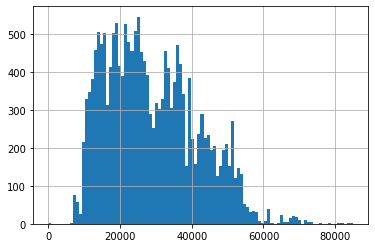

In [86]:
data['airports_nearest'].hist(bins=100)
plt.show()

<div class="alert alert-info">

Выводим гистограмму растояния до ближайшего аэропорта. Есть маленький пик, это квартиры в непосредственное близости, далее большая часть группируется в районе **20** километров.
    
</div>

In [87]:
data['airports_nearest'].isna().sum()

5542

<div class="alert alert-info">

В колонке **5542** пропуска.
    
</div>

In [88]:
data.groupby('airports_nearest')['airports_nearest'].count().head(10)

airports_nearest
0.0       1
6450.0    2
6914.0    1
6949.0    1
6989.0    6
6992.0    1
6995.0    2
7002.0    1
7016.0    4
7019.0    3
Name: airports_nearest, dtype: int64

<div class="alert alert-info">

В шестикилометровой зоне от аэропорта квартир нет.
    
</div>

In [89]:
data[data['airports_nearest'] > 6000]['airports_nearest'].describe()

count    18156.000000
mean     28795.258096
std      12629.420568
min       6450.000000
25%      18585.000000
50%      26726.000000
75%      37273.500000
max      84869.000000
Name: airports_nearest, dtype: float64

<div class="alert alert-info">

Медианное значение в районе **26,7** киллометров, минимальное **6,5** и максимальное удаление **85** километров.
    
</div>

#### Расстояние до центра города в метрах (м)

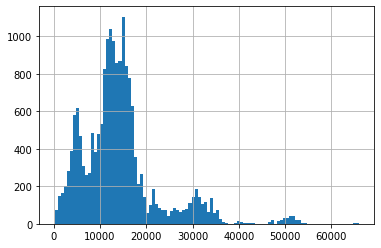

In [90]:
data['city_centers_nearest'].hist(bins=100)
plt.show()

<div class="alert alert-info">

Вовоим гистограмму по растоянию от центра города. Выделяются два пика, первый на удалении **5** километров, второй более шировий от **11** до **17** километров.
    
</div>

In [91]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<div class="alert alert-info">

Выводим данные по растоянию от центра города. Минимальное растояние **181** метр, максимальное **66** километров, а медиана **13** километров.
    
</div>

In [92]:
data['city_centers_nearest'].isna().sum()

5519

<div class="alert alert-info">

Выявлены пропуски.
    
</div>

In [93]:
data['city_centers_nearest'].head(10)

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
5        NaN
6    19143.0
7    11634.0
8        NaN
9    15008.0
Name: city_centers_nearest, dtype: float64

#### Число парков в радиусе 3 км

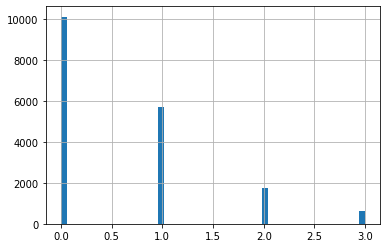

In [94]:
data['parks_around3000'].hist(bins=50)
plt.show()

<div class="alert alert-info">

Выводим информацию о наличии парков в трехкилометровой зоне. 
    
</div>

In [95]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

<div class="alert alert-info">

Значения разделились на **4** категории и пропуски.
    
</div>

In [96]:
data['parks_around3000'].isna().sum()

5518

<div class="alert alert-info">

Выявлены **5518** пропусков.
    
</div>

In [97]:
data.groupby('parks_around3000')['parks_around3000'].count().head(10)

parks_around3000
0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [98]:
data[data['parks_around3000'] !=0]['parks_around3000'].count()

8075

<div class="alert alert-info">

Только **44%** квартир располагаются в близи парков
    
</div>

#### Расстояние до ближайшего парка (м)

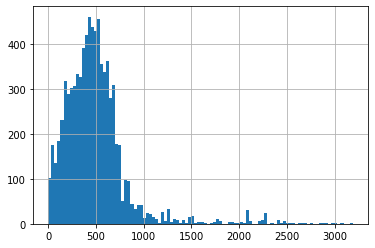

In [99]:
data['parks_nearest'].hist(bins=100)
plt.show()

<div class="alert alert-info">

Выводим гистограмму растояния до ближайшего парка. Отчетливый пик в районе **500** метром.
    
</div>

In [100]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<div class="alert alert-info">

Значение медианы в **455** метров подтверждает предварительные выводы. Максимальное растояние **3190** метров, а минимальное всего **1**.
    
</div>

In [101]:
data['parks_nearest'].isna().sum()

15620

<div class="alert alert-info">

Выявлено **15620** пропусков. 
    
</div>

#### Число водоёмов в радиусе 3 км

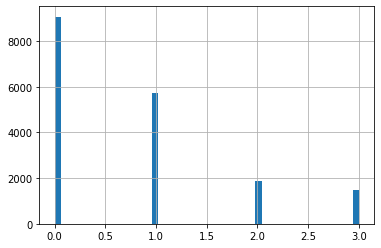

In [102]:
data['ponds_around3000'].hist(bins=50)
plt.show()

<div class="alert alert-info">

Выводин информацию о количестве водоемов в трехкилометровой зоне. Данные разделились на **четыри группы**.
    
</div>

In [103]:
data['ponds_around3000'].isna().sum()

5518

<div class="alert alert-info">

Выявлены **5518** пропущенных значения.
    
</div>

In [104]:
data.groupby('ponds_around3000')['ponds_around3000'].count().head(10)

ponds_around3000
0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [105]:
data[data['ponds_around3000'] !=0]['ponds_around3000'].count()

9110

<div class="alert alert-info">

Около **38%** квартир располагаются в трехкилометровой зоне от водоёма.
    
</div>

#### Расстояние до ближайшего водоёма (м)

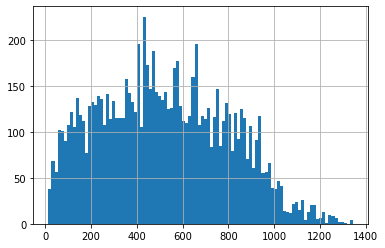

In [106]:
data['ponds_nearest'].hist(bins=100)
plt.show()

<div class="alert alert-info">

Выводим гистограмму по растоянию до ближайшего водоема. Большая часть квартир располагаются в километровой зоне от водоема, это не удивительно, ведь мы рассматрииваем в основном Санкт Петербург. 
    
</div>

In [107]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

<div class="alert alert-info">

Медиана **502** метров, минимальное значение **13** (***если будут пропуски, можно будет использовать 0***), максимальное значение **1344** метра.  
    
</div>

In [108]:
data['ponds_nearest'].isna().sum()

14589

<div class="alert alert-info">

Выявлены **14589** пропусков.  
    
</div>

In [109]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'].isna().sum()

0

<div class="alert alert-info">

Наличие или отсутствие водоема, это фактор который, с точки зрения продавца-покупателя, может оказывать влияние на стоимость, поэтому наличие такового неприменно нашло бы отражения в объявлении, но если его нет, то параметр этот кажется не значительным. Поэтому пропуски заменим на **0** и в дальнейшем исключим его из выборки.  
    
</div>

#### Сколько дней было размещено объявление (от публикации до снятия)

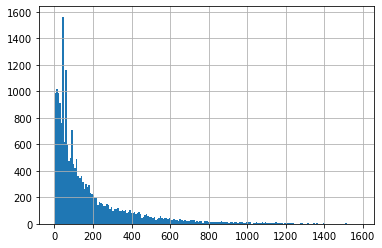

In [110]:
data['days_exposition'].hist(bins=200)
plt.show()

<div class="alert alert-info">

Выведем гистограмму по количеству дней публикации объявления. Отчетливо заметны пики в начале графика, далее идет равномерное снижение.   
    
</div>

In [111]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-info">

Выведем осоновную информацию по количеству дней размещения объявлений. Минимальное значение **1** день, максимальное **1580** ***(это белее 4-х лет)***. Медиана **95** дней ***(3 месяца)***.    
    
</div>

In [112]:
data['days_exposition'].isna().sum()

3181

<div class="alert alert-info">

Выявили **3181** пропуск. Так как у нас минимальное значение **1**, можем использовать **0** как заглушку и исключить его из дальнейшего анализа.     
    
</div>

In [113]:
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'].isna().sum()

0

<div class="alert alert-info">

От пропусков избавились.    
    
</div>

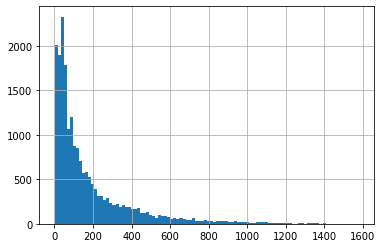

In [114]:
days_exposition_filter = data.query('days_exposition >=1')
days_exposition_filter['days_exposition'].hist(bins=100)
plt.show()

<div class="alert alert-info">

Создадим переменную `days_exposition_filter` в которую запишем данные колонки `days_exposition` без нулевых значений.
    
</div>

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [115]:
data['price_meter'] = last_price_filter['last_price']/data['total_area']
data['price_meter'].head(10)

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
5     95065.789474
6     99195.710456
7    110544.692737
8     87454.764777
9     88524.590164
Name: price_meter, dtype: float64

<div class="alert alert-info">

Создадим новую колонку `price_meter` с данными о цене квадратного метра, для этого переменную `last_price_filter` разделим на `total_area`. 
    
</div>

In [116]:
data['price_meter'].sort_values(ascending= False).head(10)

1436     1.736842e+06
22831    1.542605e+06
4996     9.959839e+05
16461    8.575429e+05
4859     8.484848e+05
17172    8.484848e+05
16647    8.413793e+05
17912    8.132530e+05
8322     7.215190e+05
6462     7.192982e+05
Name: price_meter, dtype: float64

<div class="alert alert-info">

Отсортируем колонку с ценой по убыванию, посмотрим на максимальные значения. 
    
</div>

In [117]:
data['price_meter'].sort_values().head(10)

11351    10185.185185
23477    10507.246377
19460    10769.230769
9471     10897.435897
15969    10925.925926
16444    11250.000000
10595    11587.301587
7962     11904.761905
18841    12422.360248
22549    12542.372881
Name: price_meter, dtype: float64

<div class="alert alert-info">

Отсортируем колонку по возрастанию.   
    
</div>

In [118]:
data['price_meter'].describe()

count    2.367800e+04
mean     9.935839e+04
std      4.846728e+04
min      1.018519e+04
25%      7.666667e+04
50%      9.500000e+04
75%      1.142599e+05
max      1.736842e+06
Name: price_meter, dtype: float64

<div class="alert alert-info">

Выведем общую информацию. Медиана составляет **95 000** рубль, максимальное значение 
    составляет **1 736 842** рубля, минимальное значение **10 185** рублей. Разброс очень большой. 
    
</div>

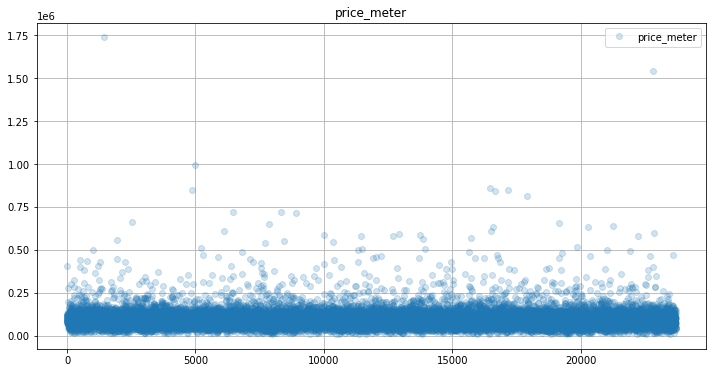

In [119]:
#price = data.query('price_meter > 10000 and price_meter < 1000000')
data.plot(y='price_meter', title='price_meter', \
          style='o', grid=True, figsize=(12, 6), alpha=0.2)
plt.show()

<div class="alert alert-info">

Визуализируем данные методом `plot`. Хорошо видем основной массив до **150** и выбросы выше **400** тр. 
    
</div>

#### День публикации объявления

In [120]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['day_exposition'].head(10)

0    3
1    1
2    3
3    4
4    1
5    0
6    3
7    3
8    2
9    6
Name: day_exposition, dtype: int64

<div class="alert alert-info">

Создадим новую колонку `day_exposition` в которой запишем день начала публикации объявления. С помощью функции `dt.weekday` примененной к колонке `first_day_exposition` получим обозначения дня недели, где **0** это **понедельник**, **1 вторник** и тд.  
    
</div>

In [121]:
data.groupby('day_exposition')['day_exposition'].count().sort_values(ascending= False)

day_exposition
3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: day_exposition, dtype: int64

<div class="alert alert-info">

Сгруппируем данные по дням недели и отсортируем по убыванию. Видим, что наибольшее количество объявлений размещают в **четверг**.   
    
</div>

In [122]:
def week (row):
    if row == 0:
        return 'понедельник'
    elif row == 1:
        return 'вторник'
    elif row == 2:
        return 'среда'
    elif row == 3:
        return 'четверг'
    elif row == 4:
        return 'пятница'
    elif row == 5:
        return 'суббота'
    elif row == 6:
        return 'воскресение'
data['day_exposition'] = data['day_exposition'].apply(week)
data.groupby('day_exposition')['day_exposition'].count().sort_values(ascending= False)
    

day_exposition
четверг        4295
вторник        4183
пятница        4000
среда          3974
понедельник    3612
суббота        1936
воскресение    1699
Name: day_exposition, dtype: int64

<div class="alert alert-info">

Переименуем обозначения дней недели с цифрового в буквенные формат. Для этого создадим функцию `week`, которая переберет колонку и заменит названия. Далее применим эту функцию к нашей колонке, после этого сгруппируем и отсортируем по убыванию.    
    
</div>

#### Месяц публикации объявления

In [123]:
data['month_exposition'] = pd.DatetimeIndex(\
                data['first_day_exposition']).month
data['month_exposition'].head(12)

0      3
1     12
2      8
3      7
4      6
5      9
6     11
7      4
8      5
9      2
10    11
11     8
Name: month_exposition, dtype: int64

<div class="alert alert-info">

 Создадим новую колонку `month_exposition` и запишем в нее обозначение месяца, данные сформируем из колонки
   `first_day_exposition` методом `pd.DatetimeIndex` с указанием индекса округления `month`.
    
</div>

In [124]:
data.groupby('month_exposition')['month_exposition'].count().sort_values(ascending= False)

month_exposition
2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month_exposition, dtype: int64

<div class="alert alert-info">

Сгруппируем данные по месяцам в порядке убывания. По данным можно сделать вывод, что весной рынок недвиживости оживает, первая тройка по количеству публикаций это **март, апрель и май**. 
    
</div>

In [125]:
def month (row):
    if row == 1:
        return 'январь'
    elif row == 2:
        return 'февраль'
    elif row == 3:
        return 'март'
    elif row == 4:
        return 'апрель'
    elif row == 5:
        return 'май'
    elif row == 6:
        return 'июнь'
    elif row == 7:
        return 'июль'
    elif row == 8:
        return 'август'
    elif row == 9:
        return 'сентябрь'
    elif row == 10:
        return 'октябрь'
    elif row == 11:
        return 'ноябрь'
    elif row == 12:
        return 'декабрь'
data['month_exposition'] = data['month_exposition'].apply(month)
data.groupby('month_exposition')['month_exposition'].count().sort_values(ascending= False)

month_exposition
февраль     2640
март        2587
апрель      2379
ноябрь      2371
октябрь     2127
сентябрь    1981
июнь        1760
август      1744
июль        1695
декабрь     1641
январь      1500
май         1274
Name: month_exposition, dtype: int64

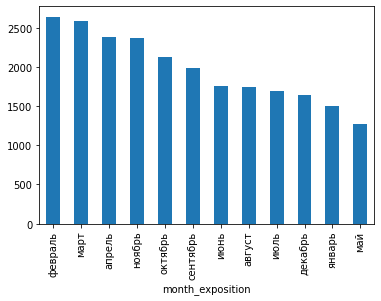

In [126]:
data.groupby('month_exposition')['month_exposition'].\
count().sort_values(ascending= False).plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим функцию `month` которая заменит название обозначающие месяца, с числового в буквенный формат. Далее применим эту функцию к нашей колонке, потом сгруппируем и отсортируем данные по убыванию. Такой вид приятнее глазу для изучения. 
    
</div>

#### Год публикации объявления

In [127]:
data['year_exposition'] = pd.DatetimeIndex(\
                data['first_day_exposition']).year
data['year_exposition'].head(10)

0    2019
1    2018
2    2015
3    2015
4    2018
5    2018
6    2017
7    2019
8    2018
9    2017
Name: year_exposition, dtype: int64

<div class="alert alert-info">

Создадим новую `year_exposition` колонку с обозначением года публикации объявления, данные сформируем из колонки `first_day_exposition` методом `pd.DatetimeIndex` с указанием индекса округления `year`.  
    
</div>

In [128]:
data.groupby('year_exposition')['year_exposition'].count().sort_values(ascending= False)

year_exposition
2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year_exposition, dtype: int64

<div class="alert alert-info">

Сформируем данные по году публикации. В **2017 и 2018** годах наблюдаем очень сильный рост публикаций, а уже в **2019** существенный спад.     
    
</div>

#### Тип этажа квартиры

In [129]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis = 1)
print(data['floor_type'].head(5))

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_type, dtype: object


<div class="alert alert-info">

Создадим новую колонку `floor_type` запишем в нее значение типа этажа, где есть **первый**, **последний** и **другой**. Для этого создадим функцию которая быдет принимать значение колонки `floor` и сравнивать ее с колонкой `floors_total`. Далее применим эту функцию к новой колонке. 
    
</div>

In [130]:
data.groupby('floor_type')['floor_type'].count().sort_values(ascending= False)

floor_type
другой       17446
последний     3336
первый        2917
Name: floor_type, dtype: int64

<div class="alert alert-info">

Сгруппируем и отсортируем данные по типу этажей. Интересно, что первый этаж продают реже чем последний. 
    
</div>

#### Расстояние в км до центра города


In [131]:
data['city_centers_nearest'].head(10)

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
5        NaN
6    19143.0
7    11634.0
8        NaN
9    15008.0
Name: city_centers_nearest, dtype: float64

<div class="alert alert-info">

Выведем первые 10 строк данных по удаленности от центра. Информация указана в **метрах**.
    
</div>

In [132]:
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round() # округлим до целого значения
data['city_centers_nearest_km'].head(10)

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
5     NaN
6    19.0
7    12.0
8     NaN
9    15.0
Name: city_centers_nearest_km, dtype: float64

<div class="alert alert-info">

Создадим новую колонку `city_centers_nearest_km` в которую запишем данные в формате километра. Для этого данные из колонки `city_centers_nearest` поделем на **1000**. Методом `round` округляем значение до целочисленного. 
    
</div>

### Проведем исследовательский анализ данных

#### Изучаем как быстро продавались квартиры

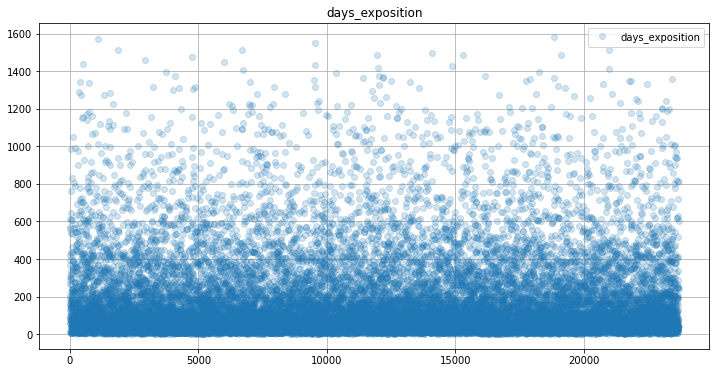

In [133]:
exposition = data.query('days_exposition >= 1')
exposition.plot(y='days_exposition', title='days_exposition', \
          style='o', grid=True, figsize=(12, 6), alpha=0.2)
plt.show()

<div class="alert alert-info">

Выведем график распределения, на нем можно наблюдать начало небольших пробелов в районе **150** дней. Но более точно сказать трудно.     
    
</div>

In [134]:
exposition['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-info">

Посмотрим на объщую информацию, медиана на **95**, среднее значение **180**, минимум **1**, а максимум **1580**.    
    
</div>

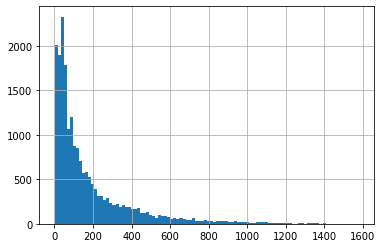

In [135]:
exposition['days_exposition'].hist(bins=100)
plt.show()

<div class="alert alert-info">

Гистограмма в этом случае отображает более информативно.     
    
</div>

#### Изучаем параметр общая площадь

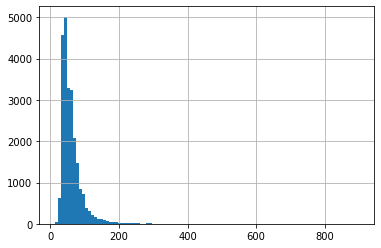

In [136]:
data['total_area'].hist(bins=100)
plt.show()

In [137]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<div class="alert alert-info">
    
Построим гистограмму. Она показывает типичное распределение Пуассона.
    
Параметры общей площади показывают следующие значения:
* среднее значение **60,3**
* медианное значение **52**
* минимум на отметке **12** (это не аномалия, есть квартиры и с меньшей площадью) 
* максимум на отметке **900** (это не аномалия, такие значения встречаются в категории элитного жилья)
    
</div>

#### Изучаем параметр жилая площадь

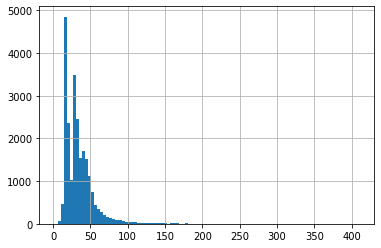

In [138]:
data['living_area'].hist(bins=100)
plt.show()

In [139]:
data['living_area'].describe()

count    23699.000000
mean        34.578214
std         22.340665
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

<div class="alert alert-info">
    
Построим гистограмму. Она показывает типичное распределение Пуассона, но с провалом в пиковой части.
    
Параметры жилой площади показывают следующие значения:
* среднее значение **34,5**
* медианное значение **30**
* минимум на отметке **2** (это аномалия, от показателей которые ниже **10** лучше избавиться) 
* максимум на отметке **409** (это не аномалия, а выброс, такие значения встречаются в категории элитного жилья, но лучше избавиться в дальнейшем от значений выше **200**)
    
</div>

#### Изучаем параметр площадь кухни

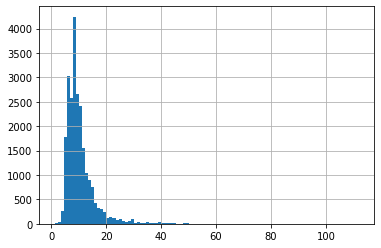

In [140]:
data['kitchen_area'].hist(bins=100)
plt.show()

In [141]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.491431
std          6.029020
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<div class="alert alert-info">
    
Построим гистограмму. Она показывает типичное распределение.
    
Параметры площади кухни показывают следующие значения:
* среднее значение **10,4**
* медианное значение **9**
* минимум на отметке **1,3** (это аномалия, от показателей которые ниже **4** лучше избавиться) 
* максимум на отметке **112** (это выброс, лучше избавиться в дальнейшем от значений выше **40**)
    
</div>

#### Изучаем параметр цена объекта

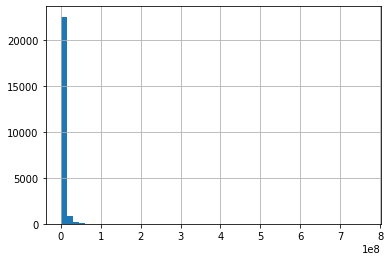

In [142]:
data['last_price'].hist(bins=50)
plt.show()

In [143]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<div class="alert alert-info">
    
Построим гистограмму. Она показывает типичное распределение.
    
Параметры цены объекта показывают следующие значения:
* среднее значение **6 541 549**
* медианное значение **4 650 000**
* минимум на отметке **1 219** (это аномалия, от показателей которые ниже **500 000** лучше избавиться) 
* максимум на отметке **763 000 000** (это не аномалия, а выброс, лучше избавиться в дальнейшем от значений выше **400 000 000**)
    
</div>

#### Изучаем параметр количества комнат

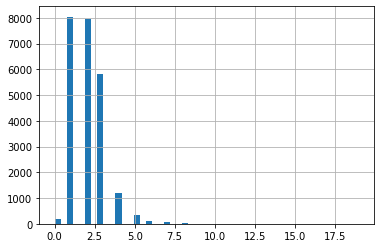

In [144]:
data['rooms'].hist(bins=50)
plt.show()

In [145]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<div class="alert alert-info">
    
Построим гистограмму. Она показывает, что данные категориальные, распределение правильное.
    
Параметры количества комнат показывают следующие значения:
* среднее значение **2**
* медианное значение **2**
* минимум на отметке **0** (это аномалия, от нее лучше избавиться) 
* максимум на отметке **19** (количество квартир в которых больше **9** комнат, **313**. Не смотря на то что это не явная аномалия, это категория элитного жилья и большое количество комнат может быть обусловлено такими помещениями как кладовая, прачка, гардеробная, серверная и тд. Доля такой элитки от общего объема квартир порядка **1,5%**, примем их за выбросы и исключим из выборки)
    
</div>

#### Изучаем параметр высота потолков

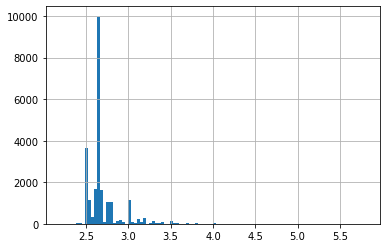

In [146]:
ceiling_height_filter['ceiling_height'].hist(bins=100)
plt.show()

In [147]:
ceiling_height_filter['ceiling_height'].describe()

count    23676.000000
mean         2.697095
std          0.219631
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

<div class="alert alert-info">
    
Построим гистограмму. Она показывает разброс из за дробности значений.
    
Параметры высоты потолков показывают следующие значения:
* среднее значение **2,69**
* медианное значение **2,7**
* минимум на отметке **2,2**  
* максимум на отметке **5,8**
    
    На стадии предобработки, мы уже избавились от аномальных значений и подготовили данные для анализа.
    
</div>

#### Изучаем параметр этаж квартиры

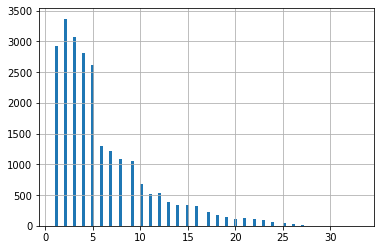

In [148]:
data['floor'].hist(bins=100)
plt.show()

In [149]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<div class="alert alert-info">
    
Построим гистограмму. Она показывает, что данные категориальные, распределение Пуассона.
    
Параметры количества комнат показывают следующие значения:
* среднее значение **5,8**
* медианное значение **4**
* минимум на отметке **1**  
* максимум на отметке **33**
    
</div>

#### Изучаем параметр общее количество этажей в доме

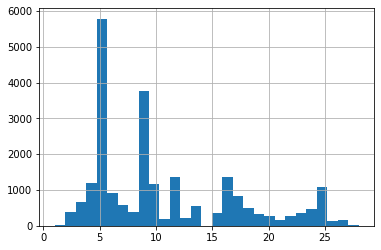

In [150]:
floors_total_filter['floors_total'].hist(bins=29)
plt.show()

In [151]:
floors_total_filter['floors_total'].describe()

count    23580.000000
mean        10.638168
std          6.529542
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64

<div class="alert alert-info">
    
Построим гистограмму. Она показывает, что данные категориальные, распределение не равномерное.
    
Параметры количества этажей в доме показывают следующие значения:
* среднее значение **10,6**
* медианное значение **9**
* минимум на отметке **1**  
* максимум на отметке **28** (на этапе предобработки мы уже очистили данные от аномалий и подготовили этот показатель к анализу)
    
</div>

#### Изучаем параметр расстояние до центра города в метрах

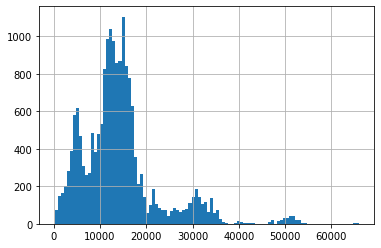

In [152]:
data['city_centers_nearest'].hist(bins=100)
plt.show()

In [153]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<div class="alert alert-info">
    
Построим гистограмму. Она показывает нормальное распределение, но с двойным пиком (в районе 5 км и 15 км).
    
Параметры расстояния до центра города показывают следующие значения:
* среднее значение **14 191 метр**
* медианное значение **13 098 метров**
* минимум на отметке **181 метр**  
* максимум на отметке **65 968 метров** (это уже пригород)
    
</div>

#### Изучаем параметр расстояние до ближайшего аэропорта

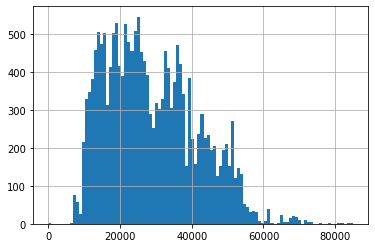

In [154]:
data['airports_nearest'].hist(bins=100)
plt.show()

In [155]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<div class="alert alert-info">
    
Построим гистограмму. Она показывает нормальное распределение.
    
Параметры расстояния до аэропорта показывают следующие значения:
* среднее значение **28 793 метр**
* медианное значение **26 726 метров**
* минимум на отметке **0 метр** (это аномалия, от этого значение можно избавиться)
* максимум на отметке **84 869 метров**
    
</div>

#### Изучаем параметр день публикации объявления

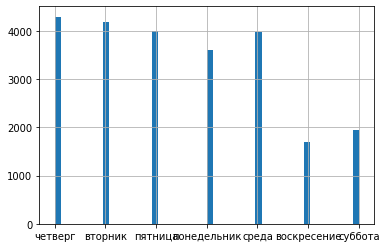

In [156]:
data['day_exposition'].hist(bins=50)
plt.show()

In [157]:
data['day_exposition'].describe()

count       23699
unique          7
top       четверг
freq         4295
Name: day_exposition, dtype: object

<div class="alert alert-info">
    
Построим гистограмму. Она показывает, что показатель категориальный, распределение равномерное (за исключением выходных дней).
    
Параметры дня недели показывают следующие значения:
* всего показателей **7**
* самый массовый **четверг**

    
</div>

#### Изучаем параметр месяц публикации объявления

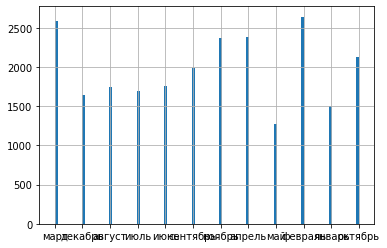

In [158]:
data['month_exposition'].hist(bins=100)
plt.show()

In [159]:
data['month_exposition'].describe()

count       23699
unique         12
top       февраль
freq         2640
Name: month_exposition, dtype: object

<div class="alert alert-info">
    
Построим гистограмму. Она показывает, что показатель категориальный, распределение неравномерное.
    
Параметры месяц размещения объявления показывают следующие значения:
* всего показателей **12**
* самый массовый **февраль**

    
</div>

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Объщая площадь квартиры

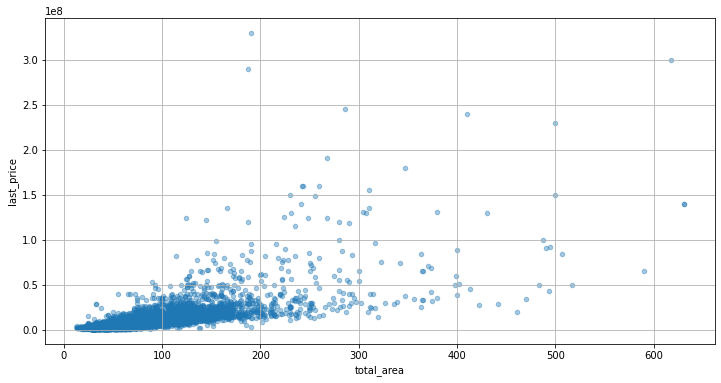

In [160]:
last_price_filter.plot(x='total_area', y= 'last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике можем наблюдать зависимость от объщей площади, при увеличении площади увеличивается и цена, стабильный рост до уровня **150**, далее область элитного жилья в которой играют роль и другие параметры, поэтому мы наблюдаем разброс и выбросы.     
    
</div>

##### Жилая площадь квартиры

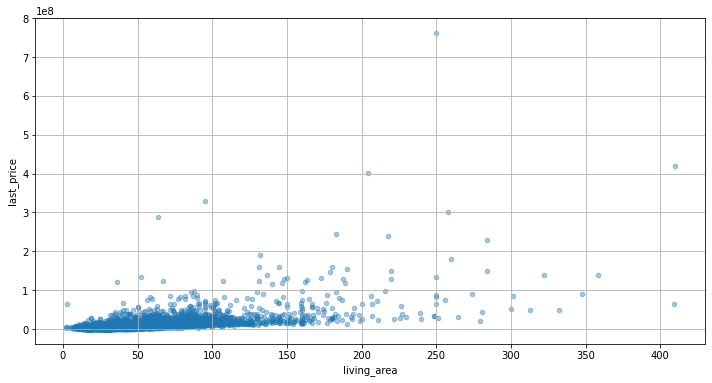

In [161]:
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике видна динамика роста до показателей в районе **70** метров, далее наблюдается разброс и зависимость не очевидна. Так же как и с общей площадью, закономерность можем наблюдать в рамках стандартного жилья, когда показатель переходят в область элитного, то тут уже закономерность слабо выражена, играют роль и другие параметры.      
    
</div>

##### Площадь кухни 

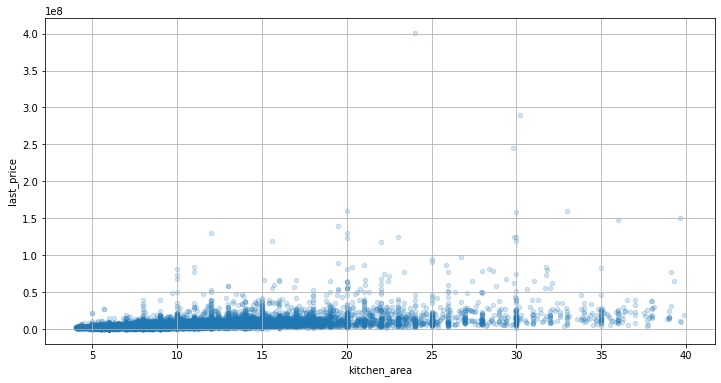

In [162]:
kitchen_area_filter.plot(x='kitchen_area',\
                         y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.2)
plt.show()

<div class="alert alert-info">

На графике площади кухни наблюдаем небольшую динамику до показателей **12** метров, далее зависимость цены не очевидна. При этом можем наблюдать интересное явление, на графике просматривается разброс по цене при значениях площади целочисленным числом (как водяные знаки)     
    
</div>

##### Количество комнат

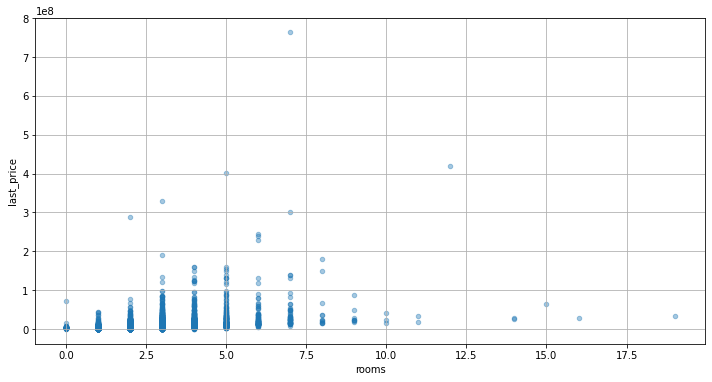

In [163]:
data.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

Зависимость наблюдаем с **2 до 4** комнат, далее график выравнивается на **5** и начинает постепенно снижаться с небольшими выбросами.     
    
</div>

In [164]:
rooms_filter.pivot_table(index= 'rooms', values='last_price',aggfunc='mean')

,last_price
rooms,
1,3.835362e+06
2,5.591605e+06
3,8.179119e+06
4,1.342350e+07
5,2.376208e+07
6,3.170975e+07
7,5.147007e+07
8,5.022417e+07


<div class="alert alert-info">

Создадим сводную таблицу в которой скруппируем данные по комнатам и выведем среднее значение стоимости в группе.
    
</div>

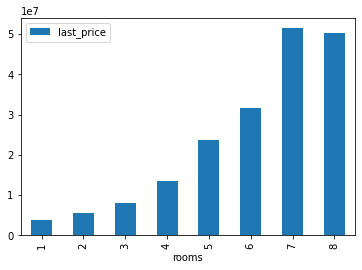

In [165]:
rooms_f_pivot = rooms_filter.pivot_table(index= 'rooms', values='last_price',aggfunc='mean')
rooms_f_pivot.plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую диаграмму на основе сводной таблици. Сейчас отчетливо видим зависимость итоговой цены от количества комнат. 
    
</div>

##### Высота потолков

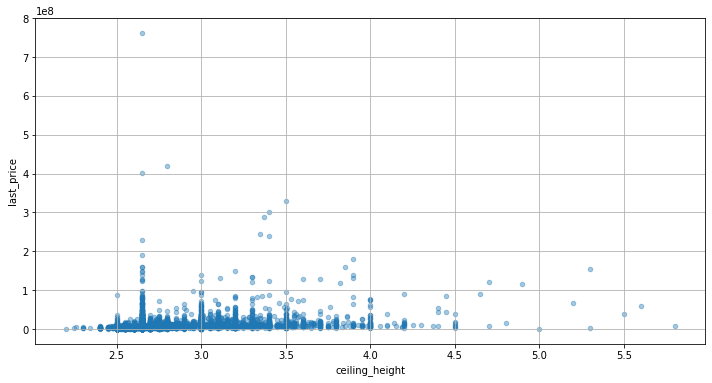

In [166]:
ceiling_height_filter.plot(x='ceiling_height', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике распределения заметны выбросы в районе **2,7-4** метров, в остальных случаях зависимость не очевидная. Интересно, что в районе **2,7** метра замечены выборы по максимальное стоимости, они еденичны, но присутствуют. В границах **3-4** метров выбросов больше, но по стоимости они меньше. Прямой зависимости не наблюдается, только если в совокупности.      
    
</div>

##### Этаж

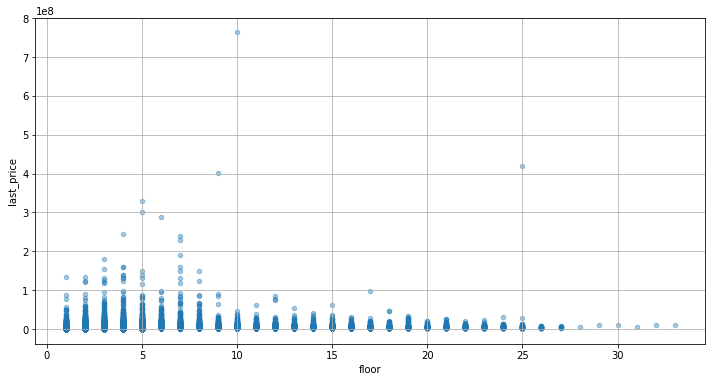

In [167]:
data.plot(x='floor', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

Наблюдаем небольшую группу колебаний в пределах с **2 по 9** этаж, далее зависимость минимальная.     
    
</div>

In [168]:
data.pivot_table(index= 'floor', values='last_price',aggfunc='mean')

,last_price
floor,
1,4.803560e+06
2,6.162038e+06
3,6.731822e+06
4,7.136267e+06
5,6.617043e+06
6,7.547030e+06
7,7.909067e+06
8,6.824281e+06
9,6.310004e+06


<div class="alert alert-info">

Создадим сводную таблицу, которую сгруппируем по этажам и выведем среднее значение по стоимости в группе. 
    
</div>

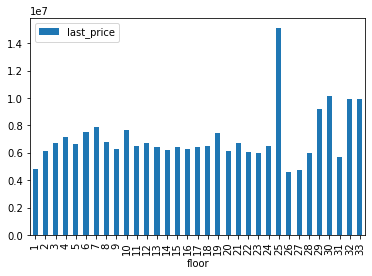

In [169]:
floor_pivot = data.pivot_table(index= 'floor', values='last_price',aggfunc='mean')
floor_pivot.plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую диаграмму на основе сводной таблици. Сейчас отчетливо видим зависимость роста цены по отношению к этажу с **1** по **7** этаж. Еще видим небольшой провал в районе **5** и **9** этажа, это может быть связано с типом этажа (**последний**). Эту гипотезу проверим отдельно.   
    
</div>

##### Количество этажей в доме

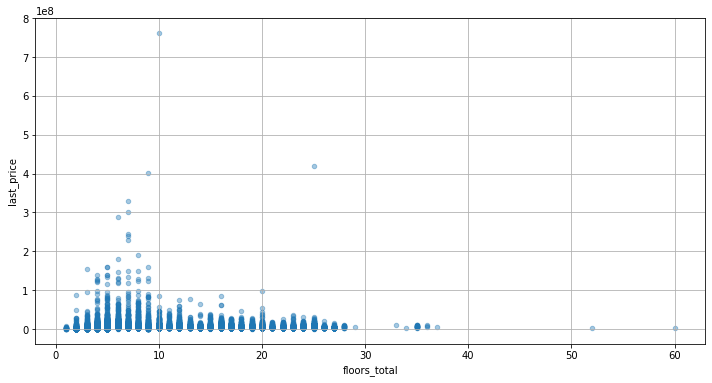

In [170]:
data.plot(x='floors_total', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике наблюдаем небольшую горку в пределах от **2 до 9** этажа, в остальных случаях зависимость минимальная.     
    
</div>

In [171]:
floors_total_filter.pivot_table(index= 'floors_total', values='last_price',aggfunc='mean')

,last_price
floors_total,
1.0,2.788200e+06
2.0,3.604602e+06
3.0,5.930935e+06
4.0,8.036974e+06
5.0,5.195635e+06
6.0,1.180839e+07
7.0,1.394911e+07
8.0,1.548006e+07
9.0,5.245510e+06


<div class="alert alert-info">

Создадим сводную таблицу по этажности строения и запишем в нее среднее значение стоимости квартиры.   
    
</div>

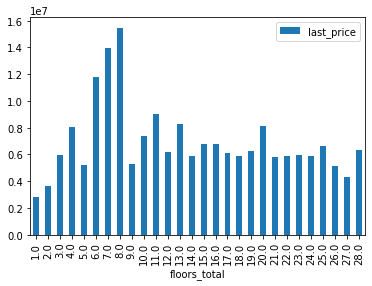

In [172]:
floors_total_filter.pivot_table(index= 'floors_total', values='last_price',aggfunc='mean')
floors_t_f_pivot = floors_total_filter.pivot_table(index= 'floors_total',\
                                                   values='last_price',aggfunc='mean')
floors_t_f_pivot.plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую диаграмму на основе сводной таблици. Сейчас отчетливо видим зависимость роста цены по отношению к этажу с **1** по **8** этаж. Еще видим небольшой провал в районе **5** и **9** этажа, это может быть связано с типом этажа (**последний**). Эту гипотезу проверим отдельно.   
    
</div>

##### Тип этажа

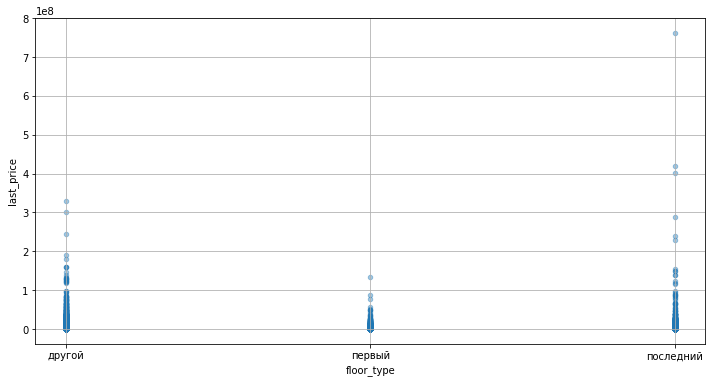

In [173]:
data.plot(x='floor_type', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике распределения видим, что первый этаж менее подвержен влиянию, а вот верхние этажы отличаются наличием разброса и выброса от всех остальных.     
    
</div>

In [174]:
data.pivot_table(index= 'floor_type', values='last_price',aggfunc='mean')

,last_price
floor_type,
другой,6.675444e+06
первый,4.803560e+06
последний,7.361025e+06


<div class="alert alert-info">

Создадим сводную таблицу по типам этажей и выведем среднее значение по стоимости.   
    
</div>

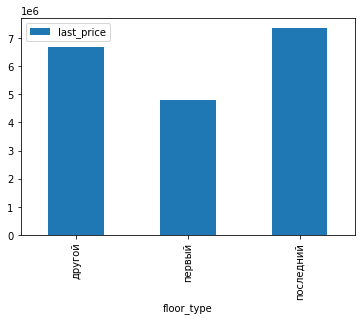

In [175]:
floor_type_pivot = data.pivot_table(index= 'floor_type', values='last_price',aggfunc='mean')
floor_type_pivot.plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую диаграмму на основе сводной таблици. Гипотеза не подтвердилась, так как последние этажы показывают наибольшую стоимость по группам. Наименьшая стоимость у первого этажа, таким образом мы видим, что зависимость прослеживается (чем выше тем дороже).    
    
</div>

##### Наличие балкона

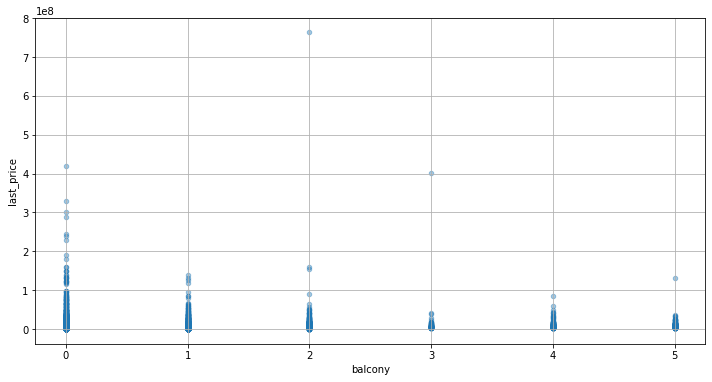

In [176]:
data.plot(x='balcony', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике распределения мы не наблюдаем четкой зависимости цены от наличия балкона.     
    
</div>

In [177]:
balcony_filter = data.query('balcony >=1 and balcony <4')


<div class="alert alert-info">

Создадим переменную `balcony_filter` в которую запишем значения колонки `balcony` без аномальных значений.   
    
</div>

In [178]:
balcony_filter.pivot_table(index= 'balcony', values='last_price',aggfunc='mean')

,last_price
balcony,
1.0,5.942251e+06
2.0,6.065327e+06
3.0,1.364658e+07


<div class="alert alert-info">

Создадим сводную таблицу по количеству балконов и выведем среднее значение по стоимости.   
    
</div>

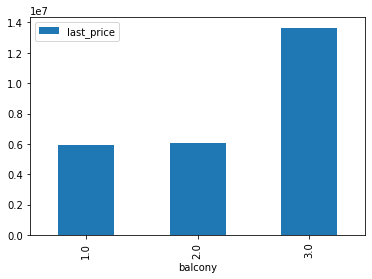

In [179]:
balcony_filter_pivot = balcony_filter.pivot_table(index= 'balcony', \
                                                  values='last_price',aggfunc='mean')
balcony_filter_pivot.plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую диаграмму на основе сводной таблици. Разница значения у **1** и **2** балконов не значительная, но в пользу **2**, а вот наличие **3** уже существенно прибавляет к стоимости. 
    
</div>

##### Зависимость от цены за метр

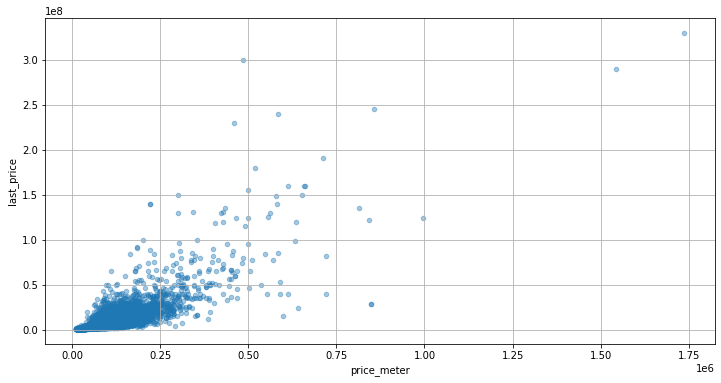

In [180]:
data.plot(x='price_meter', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике распределения прослеживается зависимость общей цены от цены за квадратный метр, чего и следовало ожидать.     
    
</div>

##### Тип населенного пункта

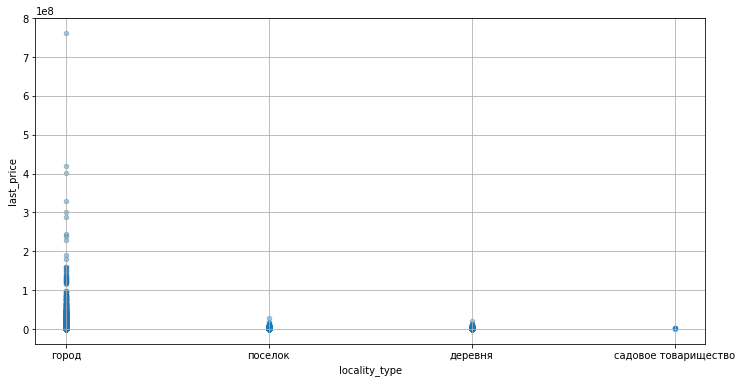

In [181]:
data.plot(x='locality_type', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике распределения отчетливо видно зависимость цены от типа населенного пункта. В городе явный разброс по ценам, а за городом все стабильно.     
    
</div>

In [182]:
data.pivot_table(index= 'locality_type', values='last_price',aggfunc='mean')

,last_price
locality_type,
город,7.119390e+06
деревня,3.281243e+06
поселок,3.390312e+06
садовое товарищество,2.110000e+06


<div class="alert alert-info">

Создадим сводную таблицу по типу населенного пункта и выведем среднее значение по стоимости.   
    
</div>

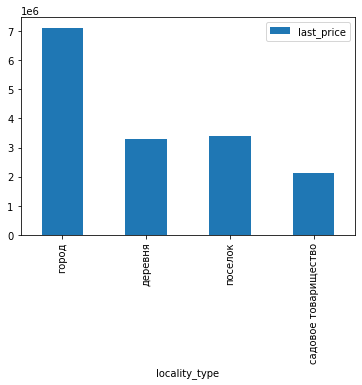

In [183]:
locality_type_pivot = data.pivot_table(index= 'locality_type', values='last_price',aggfunc='mean')
locality_type_pivot.plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую диаграмму на основе сводной таблици. Отчетливо видим, что недвижимость в **городе** значительно дороже чем в **пригороде**. Далее идет **поселок**, после него **деревня**. Это связано с тем, что **поселки**, как правило, это новые образования (*такие как котеджный поселок или поселок городского типа*), а **деревня** более аутентична. На цену садового товарищества влияет наличие инфраструктуры (*магазины и охраняемая территория*) и доступа к сетям (*водопровод, электричество, газ*).  
    
</div>

##### День размещения

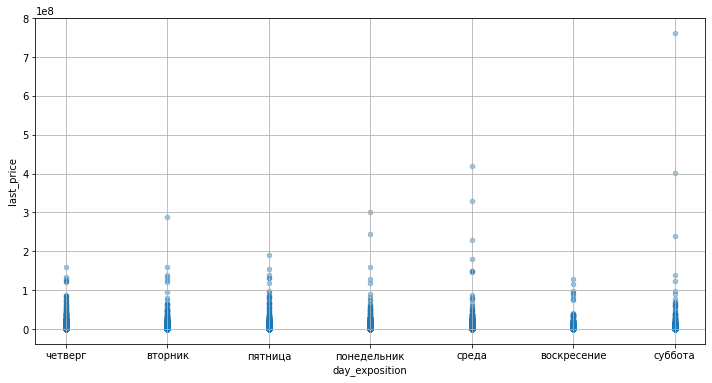

In [184]:
data.plot(x='day_exposition', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике распределения не выявлено четкой зависимости от дня недели в плане ценообразования.     
    
</div>

In [185]:
data.pivot_table(index= 'day_exposition', values='last_price',aggfunc='mean')

,last_price
day_exposition,
воскресение,6.246180e+06
вторник,6.394233e+06
понедельник,6.511613e+06
пятница,6.372131e+06
среда,6.627970e+06
суббота,6.976804e+06
четверг,6.708663e+06


<div class="alert alert-info">

Создадим сводную таблицу по дням недели и выведем среднее значение по стоимости.   
    
</div>

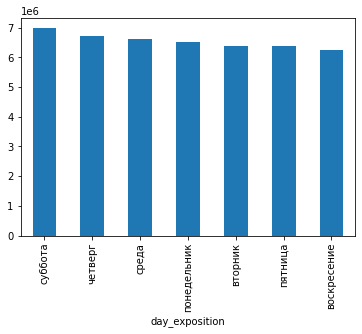

In [186]:
data.groupby('day_exposition')['last_price'].mean().sort_values(ascending= False).plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую диаграмму на основе сгруппированных и отсортированных данных. Значения от минимума к максимуму порядка **10%**, четкой зависимости нет.    
    
</div>

In [187]:
day_means_counts = data.pivot_table(index= 'day_exposition', \
                                      values='last_price',aggfunc= ['mean', 'count'])
day_means_counts.columns = [ 'mean', 'count']
display(day_means_counts)

,mean,count
day_exposition,,
воскресение,6.246180e+06,1699
вторник,6.394233e+06,4183
понедельник,6.511613e+06,3612
пятница,6.372131e+06,4000
среда,6.627970e+06,3974
суббота,6.976804e+06,1936
четверг,6.708663e+06,4295


In [188]:
print(day_means_counts['mean'].corr(day_means_counts['count']))

-0.09801139563408696


<div class="alert alert-info">

Посчитали коэффициент кореляции Пирсона по отношению количества объявлений к средней цене. Значение **-0,09** говорит, что закономерность отсутствует.     
    
</div>

##### Месяц размещения

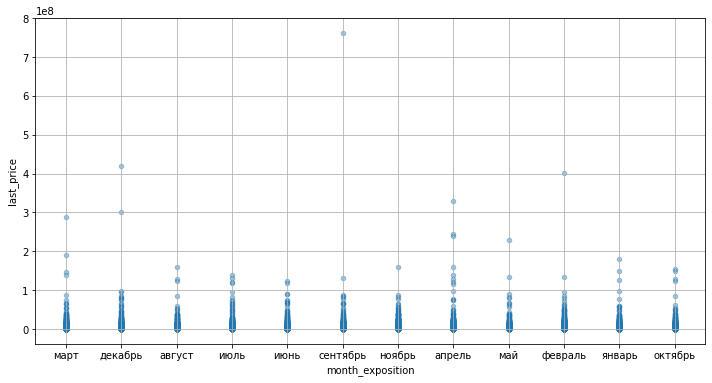

In [189]:
data.plot(x='month_exposition', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

In [190]:
month_means_counts = data.pivot_table(index= 'month_exposition', \
                                      values='last_price',aggfunc= ['mean', 'count'])
month_means_counts.columns = [ 'mean', 'count']
display(month_means_counts)

,mean,count
month_exposition,,
август,6.350233e+06,1744
апрель,6.737198e+06,2379
декабрь,7.011731e+06,1641
июль,6.649337e+06,1695
июнь,6.310269e+06,1760
май,6.600435e+06,1274
март,6.359275e+06,2587
ноябрь,6.461363e+06,2371
октябрь,6.235013e+06,2127


In [191]:
print(month_means_counts['mean'].corr(month_means_counts['count']))

-0.30979901091161455


<div class="alert alert-info">

Посчитали коэффициент кореляции Пирсона по отношению количества объявлений к средней цене. Значение **-0,3** говорит, что закономерность противоположная но не существенная.     
    
</div>

In [192]:
data.pivot_table(index= 'month_exposition', values='last_price',aggfunc='mean')

,last_price
month_exposition,
август,6.350233e+06
апрель,6.737198e+06
декабрь,7.011731e+06
июль,6.649337e+06
июнь,6.310269e+06
май,6.600435e+06
март,6.359275e+06
ноябрь,6.461363e+06
октябрь,6.235013e+06


<div class="alert alert-info">

Создадим сводную таблицу по месяцам и выведем среднее значение по стоимости.   
    
</div>

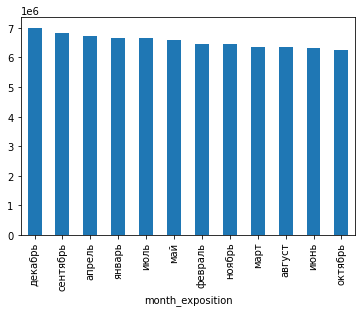

In [193]:
data.groupby('month_exposition')['last_price'].mean().sort_values(ascending= False).plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую диаграмму на основе сгруппированных и отсортированных данных. Значения от минимума к максимуму порядка **11%**, четкой зависимости нет.    
    
</div>

##### Год размещения

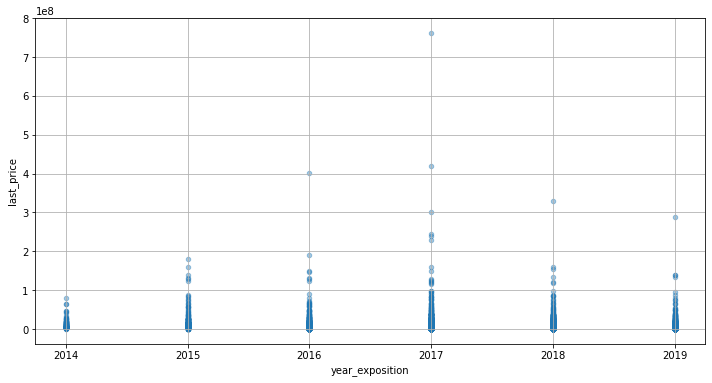

In [194]:
data.plot(x='year_exposition', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике распределения заметен рост в интервале с **2014 по 2017**, далее наблюдаем спад.     
    
</div>

In [195]:
data.pivot_table(index= 'year_exposition', values='last_price',aggfunc='mean')

,last_price
year_exposition,
2014,1.208714e+07
2015,8.572833e+06
2016,6.827912e+06
2017,6.585729e+06
2018,5.950966e+06
2019,6.782388e+06


<div class="alert alert-info">

Создадим сводную таблицу по годам и выведем среднее значение по стоимости.   
    
</div>

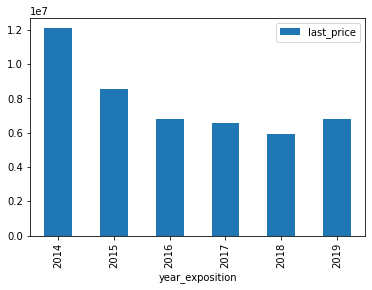

In [196]:
year_exposition_pivot = data.pivot_table(index= 'year_exposition', values='last_price',aggfunc='mean')
year_exposition_pivot.plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую гиаграмму на основе сводной таблици. И видим, что с **2014** года средняя цена снижалась и только в **2019** наметился небольшой (**13%**) рост.   
    
</div>

In [197]:
year_means_counts = data.pivot_table(index= 'year_exposition', \
                                      values='last_price',aggfunc= ['mean', 'count'])
year_means_counts.columns = [ 'mean', 'count']
display(year_means_counts)

,mean,count
year_exposition,,
2014,1.208714e+07,137
2015,8.572833e+06,1191
2016,6.827912e+06,2783
2017,6.585729e+06,8190
2018,5.950966e+06,8519
2019,6.782388e+06,2879


In [198]:
print(year_means_counts['mean'].corr(year_means_counts['count']))

-0.7367133418046581


<div class="alert alert-info">

Посчитали коэффициент кореляции Пирсона по отношению количества объявлений к средней цене. Значение **-0,73** говорит, что закономерность противоположная и довольна существенная. Чем больше предложений на рынке, тем выше конкуренция и как следствие снижение цены    
    
</div>

##### Наличие парков в трехкилометровой зоне

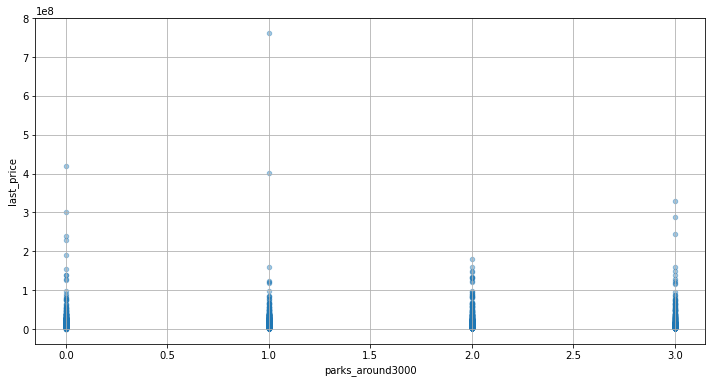

In [199]:
data.plot(x='parks_around3000', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

На графике распределения не выявленно четкой зависимости от наличия парков.     
    
</div>

In [200]:
data.pivot_table(index= 'parks_around3000', values='last_price',aggfunc='mean')

,last_price
parks_around3000,
0.0,6.391397e+06
1.0,7.944097e+06
2.0,1.036274e+07
3.0,1.524231e+07


<div class="alert alert-info">

Создадим сводную таблицу по наличию парков и выведем среднее значение по стоимости.   
    
</div>

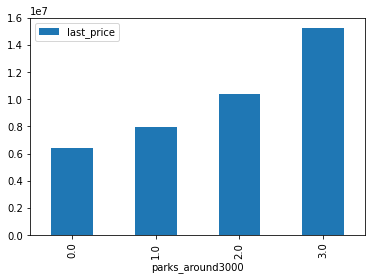

In [201]:
parks_around3000_pivot = data.pivot_table(index= 'parks_around3000', values='last_price',aggfunc='mean')
parks_around3000_pivot.plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую гиаграмму на основе сводной таблици. А вот на этом графике уже видим четкую зависимость, чем больше парков тем выше средняя цена квартиры.   
    
</div>

In [202]:
parks_means_counts = data.pivot_table(index= 'parks_around3000', \
                                      values='last_price',aggfunc= ['mean', 'count'])
parks_means_counts.columns = [ 'mean', 'count']
display(parks_means_counts)

,mean,count
parks_around3000,,
0.0,6.391397e+06,10106
1.0,7.944097e+06,5681
2.0,1.036274e+07,1747
3.0,1.524231e+07,647


In [203]:
print(parks_means_counts['mean'].corr(parks_means_counts['count']))

-0.8809212426429583


<div class="alert alert-info">

Посчитали коэффициент кореляции Пирсона по отношению количества объявлений к средней цене. Значение **-0,88** говорит, что закономерность противоположная и довольна существенная. Чем больше предложений на рынке, тем выше конкуренция и как следствие снижение цены и наоборот, чем выше цена, тем меньше предложений.    
    
</div>

##### Наличие водоемов в трехкилометровой зоне

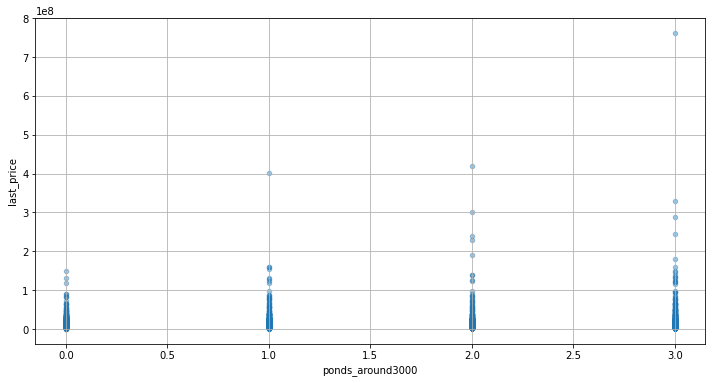

In [204]:
data.plot(x='ponds_around3000', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.4)
plt.show()

<div class="alert alert-info">

В отличии от парков, наличие водоема влияет на цену в положительную сторону, на данном графике это можно наблюдать.     
    
</div>

In [205]:
data.pivot_table(index= 'ponds_around3000', values='last_price',aggfunc='mean')

,last_price
ponds_around3000,
0.0,6.368345e+06
1.0,7.220295e+06
2.0,9.521700e+06
3.0,1.374192e+07


<div class="alert alert-info">

Создадим сводную таблицу по наличию водоемов и выведем среднее значение по стоимости.   
    
</div>

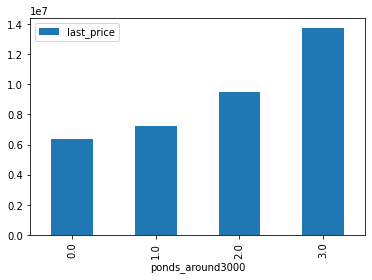

In [206]:
ponds_around3000_pivot = data.pivot_table(index= 'ponds_around3000', values='last_price',aggfunc='mean')
ponds_around3000_pivot.plot(kind='bar')
plt.show()

<div class="alert alert-info">

Создадим столбчатую гиаграмму на основе сводной таблици. На графике видим четкую зависимость, чем больше водоемов тем выше средняя цена квартиры.   
    
</div>

In [207]:
ponds_means_counts = data.pivot_table(index= 'ponds_around3000', \
                                      values='last_price', aggfunc= ['mean', 'count'])
ponds_means_counts.columns = [ 'mean', 'count']
display(ponds_means_counts)

,mean,count
ponds_around3000,,
0.0,6.368345e+06,9071
1.0,7.220295e+06,5717
2.0,9.521700e+06,1892
3.0,1.374192e+07,1501


In [208]:
print(ponds_means_counts['mean'].corr(ponds_means_counts['count']))

-0.8444053237253266


<div class="alert alert-info">

Посчитали коэффициент кореляции Пирсона по отношению количества объявлений к средней цене. Значение **-0,84** говорит, что закономерность противоположная и довольна существенная. Чем больше предложений на рынке, тем выше конкуренция и как следствие снижение цены и наоборот, чем выше цена, тем меньше предложений.    
    
</div>

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [209]:
data_price = data.pivot_table(index='locality_name', values=['last_price', 'total_area'],\
                                 aggfunc= {'last_price': ['count', 'sum'], 'total_area': 'sum'})
data_price.columns = ['price_count', 'price_sum', 'area_sum']
data_price = data_price.reset_index()
data_price['prise_metr'] = data_price['price_sum'] / data_price['area_sum']
data_price_top = data_price.sort_values(by='price_count', ascending=False).head(10)
display(data_price_top)


,locality_name,price_count,price_sum,area_sum,prise_metr
33,Санкт-Петербург,15721,1.267507e+11,1017958.15,124514.621378
216,поселок Мурино,556,2.030713e+09,24442.54,83081.092636
276,поселок Шушары,440,1.807556e+09,23681.36,76328.217594
3,Всеволожск,398,1.508049e+09,22296.83,67635.128626
32,Пушкин,369,2.387074e+09,22712.98,105097.361245
13,Колпино,338,1.339839e+09,17992.24,74467.617484
223,поселок Парголово,327,1.467600e+09,16847.50,87110.874551
6,Гатчина,307,1.070919e+09,15639.48,68475.381534
92,деревня Кудрово,299,1.266013e+09,13924.95,90916.895213
4,Выборг,237,7.704830e+08,13307.56,57898.142109


<div class="alert alert-info">

Для выявления средней цены одного квадратного метра в топ **10** населенных пунктов, создадим переменную `data_price` и запишем в нее сводную таблицу из лидеров по количеству объявлений. Далее в переменную добавим колонку сгруппированную по сумме продаж, далее добавим колонку с площадью квартир и вычеслим среднюю цену. Создавим переменную `data_price_top` и запишем в нее сортировку по топ **10** населенных пунктов.
Из полученных данных можно наблюдать как снижается цена отдаляясь от города, в ***Санкт-Петербурге*** она составляет **124 514** рублей, в ***Пушкине*** **105 097**, а в остальных опускается ниже **100 000**. 
    
</div>

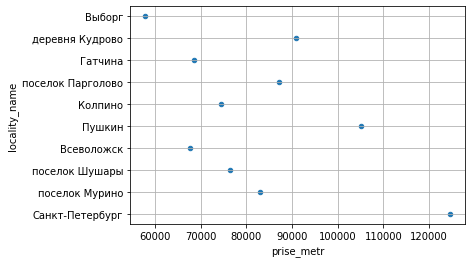

In [210]:
data_price_top.plot(x='prise_metr', y='locality_name', kind='scatter', grid=True)
plt.show()

<div class="alert alert-info">

На графике отчетливо видно это распределение.     
    
</div>

#### Вычислияем среднюю цену каждого километра в Санкт-Петербурге

In [211]:
nearest_price = data.pivot_table(index='city_centers_nearest_km', values='last_price',\
                                 aggfunc= ['count', 'mean'])
nearest_price.columns = ['count', 'mean']
nearest_price = nearest_price.reset_index()
display(nearest_price.sort_values(by='city_centers_nearest_km', ascending=True).round().head(21))


,city_centers_nearest_km,count,mean
0,0.0,27,31449116.0
1,1.0,193,21158707.0
2,2.0,311,17808293.0
3,3.0,352,11102708.0
4,4.0,696,13270610.0
5,5.0,924,14460813.0
6,6.0,618,15338418.0
7,7.0,420,14775153.0
8,8.0,599,9935921.0
9,9.0,598,6941773.0


<div class="alert alert-info">

Для определения удорожания средней стоимости квартиры относительно удаления от центра города, создадим переменную `nearest_price` в которую запишем сводную таблицу из данных по количеству объявлений и среднем значении цены квартир. Данные сгруппированы по отсортированным показателям удаленности от центра города по километровым отрезкам.   
    
</div>

In [212]:
print(nearest_price['city_centers_nearest_km'].corr(nearest_price['mean']))

-0.5945563061166232


<div class="alert alert-info">

Посмотрим кареляцию Пирсона. Значение **-0,59** говорят об отризательной зависимости, чем дальше от центра, там квартиры в среднем дешевле.     
    
</div>

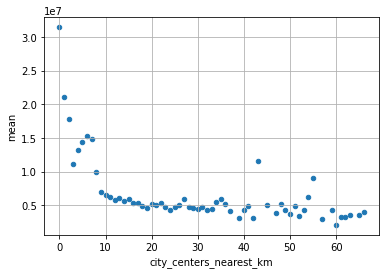

In [213]:
nearest_price.plot(x='city_centers_nearest_km', y='mean', kind='scatter', grid=True)
plt.show()

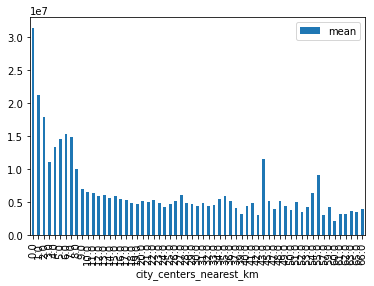

In [214]:
nearest_price_pivot = nearest_price.pivot_table(index= 'city_centers_nearest_km', values='mean')
nearest_price_pivot.plot(kind='bar')
plt.show()

<div class="alert alert-info">

На графике можем наблюдать резкое снижение с **0** км. по **3** км. (**с 31 449 116 руб. до 11 102 708 руб.**), далее с **3** по **6** км. (**с 11 102 708 руб. до 15 338 418 руб.**) идет подъем, а далее уже стабильное снижение. На удалении в **20** км. наблюдаем среднюю цену в районе **5 176 527 руб**.     
    
</div>

### Общий вывод

<div class="alert alert-info">

**Провели исследования объявлений о продаже квартир в период с 2014 по 2019 год в Ленинградской области**.
    
 На первом этапе ознакомились с данными и произвели предоброботку, включающую в себя:
- разделение
- изменение типов
- изменение форматов
- обработка пропусков
    
  **Обработана и проанализирована каждая колонка, для удобства анализа использовали вывод гистограммы.**
    
    **1)** Изучили данные о количестве фотографий, узнали, что в среднем при размещении используют порядка **10** фотографий.\
    **2)** Изучили цену на момент снятия с публикации. Тут были обнраружены аномально низкие **(12 190 рублей)** и аномально высокие **(763 000 000 рублей)** значения. От аномалий избавились. \
    **3)** При обработке информации о дате публикации выявили интересную динамику рынка недвижемости. Интересен провал в первой половине **2017** года, далее наблюдаем оживление и новый провал осенью **2018** и летом **2019** года.\
    **4)** При анализе числа комнат, видим четкое разделение **1 и 2** комнатные квартиры масса которых на рынке превышает **3** комнатные почти на треть.\
    **5)** В колонке с информацией о высоте потолков, было много аномальных данных **(от 1 до 100 метров)**, аномалии удалили, а пропуски заменили на медианное значение высчитанное из соотношения в общей массе. Получили значения в районе **2,65** метров.\
    **6)** В колонке с информацией о этаже видны пиковые значения в районе **5 и 9** этажных зданий, далее пики на **17 и 25** этажных, всё выглядит логично, но есть аномалии на **36, 37, 52 и 60** этажах.\
    **7)** Данные по площади показывают медиану в районе **52** метров по общей и **9** метров по кухне, а жилая расположилась в районе **30** метров. Пропуски заменили на медианное значение высчитанное из общей массы. \
    **8)** В данных о наличии балкона отчетливо выделяются три группы и группа с одним балконом лидирует.\
    **9)** При обработке данных указывающих на населенный пункт, добавили колонку с типом населенного пункта, далее произвели замену не явных дубликатов. В итоге получили срез данных по распределению объема объявлений, на тип **город** приходится **92%** всех объявлений.\
    **10)** В данных по расстоянию до ближайшего аэропорта. Есть маленький пик, это квартиры в непосредственное близости, далее большая часть группируется в районе **20** километров, медианное значение в районе **26,7** километров, минимальное **6,5** и максимальное удаление **85** километров.\
    **11)** Данные по расстоянию от центра города. Выделяются два пика, первый на удалении **5** километров, второй более широкий от **11 до 17** километров. Минимальное расстояние **181** метр, максимальное **66** километров, а медиана **13** километров.\
    **12)** По данным о наличии парков в трехкилометровой зоне наблюдаем, что всего четверть предложений имеют таковой, остальные распологаются в удалении. Но те кто живет радом с парком, расположились от него на растоянии **500** метров.\
    **13)** По данным о наличии водоема в трехкилометровой зоне, около **40%** квартир располагаются рядом и большая часть из них располагаются в километровой зоне от водоема, это не удивительно, ведь мы рассматриваем в основном **Санкт Петербург**.\
    **14)** По данным о сроке размещения объявлений. Минимальное значение **1** день, максимальное **1580** ***(это белее 4-х лет)***. Медиана **95** дней ***(3 месяца)***.
    
    **После предобработке, посчитали и добавили новые колонки.**
    
* Далее мы вывели цену одного квадратного метра, медиана составляет **95 000** рублей, максимальное значение составляет **1 736 842** рубля, минимальное значение **10 185** рублей. На графике распределения отчетливо отобразились выбросы выше значений в **400 000** рублей.
* При обработке данных о дате размещения, разделили данные по группам ***(день недели, месяц, и год)***. Полученные значения дней недели переименовали на превычные глазу обозначения (*понедельник, вторник, среда и тд.*). Смесяцами поступили аналогично, замнили цифровое обозначение на привычное глазу название месяца (январь, февраль, март и тд.). По итогу выявили интересную информацию. Объявления чаще всего размещают во **вторник, среду и четверг**, а вот в выходные этим занимаются не охотно **(снижение на 50%)**. По месяцам, данные показывают начало активности с весны, **март, апрель и май** являются лидерами, зимой активность заметна в ноябре и декабре. По годам данные еще интереснее: 
    * **2014 - 137**
    * **2015 - 1191 (рост 870% по отношению к 2014 году)**
    * **2016 - 2783 (рост 230% по отношению к 2015 году)**
    * **2017 - 8190 (рост 290% по отношению к 2016 году)**
    * **2018 - 8519 (рост 104% по отношению к 2017 году)**
    * **2019 - 2879 (падение 34% по отношению к 2018 году)**
    
* По типу этажа квартиры разделили на следующие группы: ***первый, последний и другой***. И в выводе замечаем, что первый этаж продают реже последнего **(2917 против 3336)**, мне показалось это интересным.
* Расстояние от центра города округлили до километрового коэффициента, сделали это для удобства применения при дальнейших исследований.
    
    **При проведении исследовательского анализа изучили следующие параметры:**
    
    **1) как долго обычно продаются квартиры.**
    
    Из результатов можно сделать вывод, что не более **25%** квартир продавались быстрее **1,5 месяцев**, медианное значение расположилось в районе **3 месяцев**, а максимальный зафиксированный срок составил порядка **4 лет**.
    
    **2) общая площадь жилья**
    
Гистограмма показывает типичное распределение Пуассона.
    
Параметры общей площади показывают следующие значения:
* среднее значение **60,3**
* медианное значение **52**
* минимум на отметке **12** (это не аномалия, есть квартиры и с меньшей площадью) 
* максимум на отметке **900** (это не аномалия, такие значения встречаются в категории элитного жилья)
    
    **3) жилая площадь**
        
Гистограмма показывает типичное распределение Пуассона, но с провалом в пиковой части.
    
Параметры жилой площади показывают следующие значения:
* среднее значение **34,5**
* медианное значение **30**
* минимум на отметке **2** (это аномалия, от показателей которые ниже **10** лучше избавиться) 
* максимум на отметке **409** (это не аномалия, а выброс, такие значения встречаются в категории элитного жилья, но лучше избавиться в дальнейшем от значений выше **200**)
    
    **4) площадь кухни**
    
Гистограмма показывает типичное распределение.
    
Параметры площади кухни показывают следующие значения:
* среднее значение **10,4**
* медианное значение **9**
* минимум на отметке **1,3** (это аномалия, от показателей которые ниже **4** лучше избавиться) 
* максимум на отметке **112** (это выброс, лучше избавиться в дальнейшем от значений выше **40**)
    
    **5) цена объекта**
    
Гистограмма показывает типичное распределение.
    
Параметры цены объекта показывают следующие значения:
* среднее значение **6 541 549**
* медианное значение **4 650 000**
* минимум на отметке **1 219** (это аномалия, от показателей которые ниже **500 000** лучше избавиться) 
* максимум на отметке **763 000 000** (это не аномалия, а выброс, лучше избавиться в дальнейшем от значений выше **400 000 000**)
    
    **6) количество комнат**
    
Гистограмма показывает, что данные категориальные, распределение правильное.
    
Параметры количества комнат показывают следующие значения:
* среднее значение **2**
* медианное значение **2**
* минимум на отметке **0** (это аномалия, от нее лучше избавиться) 
* максимум на отметке **19** (количество квартир в которых больше **9** комнат, **313**. Не смотря на то что это не явная аномалия, это категория элитного жилья и большое количество комнат может быть обусловлено такими помещениями как кладовая, прачка, гардеробная, серверная и тд. Доля такой элитки от общего объема квартир порядка **1,5%**, примем их за выбросы и исключим из выборки)
    
    **7) высота потолков**
    
Гистограмма показывает разброс из за дробности значений.
    
Параметры высоты потолков показывают следующие значения:
* среднее значение **2,69**
* медианное значение **2,7**
* минимум на отметке **2,2**  
* максимум на отметке **5,8**
    
    На стадии предобработки, мы уже избавились от аномальных значений и подготовили данные для анализа.
    
    **8) этаж квартиры**
    
Гистограмма показывает, что данные категориальные, распределение Пуассона.
    
Параметры количества комнат показывают следующие значения:
* среднее значение **5,8**
* медианное значение **4**
* минимум на отметке **1**  
* максимум на отметке **33**
    
    **9) общее количество этажей**
    
Гистограмма показывает, что данные категориальные, распределение не равномерное.
    
Параметры количества этажей в доме показывают следующие значения:
* среднее значение **10,6**
* медианное значение **9**
* минимум на отметке **1**  
* максимум на отметке **28** (на этапе предобработки мы уже очистили данные от аномалий и подготовили этот показатель к анализу)
    
    **10) расстояние до центра**
    
Гистограмма показывает нормальное распределение, но с двойным пиком (в районе 5 км и 15 км).
    
Параметры расстояния до центра города показывают следующие значения:
* среднее значение **14 191 метр**
* медианное значение **13 098 метров**
* минимум на отметке **181 метр**  
* максимум на отметке **65 968 метров** (это уже пригород)
    
    **11) день недели публикации объявления**
    
Гистограмма показывает, что показатель категориальный, распределение равномерное (за исключением выходных дней).
    
Параметры дня недели показывают следующие значения:
* всего показателей **7**
* самый массовый **четверг**
    
    **12) месяц публикации объявления**
    
Гистограмма показывает, что показатель категориальный, распределение неравномерное.
    
Параметры месяц размещения объявления показывают следующие значения:
* всего показателей **12**
* самый массовый **февраль**
    
    **При изучении факторов влияющих на общую стоимость квартиры, произвели сравнительный анализ по следующим показателям:**
    
* **общая площадь** (можем наблюдать зависимость от объщей площади, при увеличении площади увеличивается и цена, стабильный рост до уровня **150**, далее область элитного жилья в которой играют роль и другие параметры, поэтому мы наблюдаем разброс и выбросы).
    
* **жилая площадь** (видна динамика роста до показателей в районе **70** метров, далее наблюдается разброс и зависимость не очевидна. Так же как и с общей площадью, закономерность можем наблюдать в рамках стандартного жилья, когда показатель переходят в область элитного, то тут уже закономерность слабо выражена, играют роль и другие параметры.)
    
* **площадь кухни** (наблюдаем небольшую динамику до показателей **12** метров, далее зависимость цены не очевидна. При этом можем наблюдать интересное явление, на графике просматривается разброс по цене при значениях площади целочисленным числом (как водяные знаки).
    
* **количество комнат** (зависимость наблюдаем с **2** до **4** комнат, далее график выравнивается на **5** и начинает постепенно снижаться с небольшими выбросами, а вот на столбчатой диаграмме отчетливо видим зависимость итоговой цены от количества комнат. Таким образом зависимость подтвердили.)
    
* **высота потолков** (на графике распределения заметны выбросы в районе **2,7-4** метров, в остальных случаях зависимость не очевидная. Интересно, что в районе **2,7** метра замечены выбросы по максимальное стоимости, они еденичны, но присутствуют. В границах **3-4** метров выбросов больше, но по стоимости они меньше. Прямой зависимости не наблюдается.)
    
* **этаж** (по столбчатой диаграмме отчетливо видим зависимость роста цены по отношению к этажу с **1** по **7** этаж. Еще видим небольшой провал в районе **5** и **9** этажа).
    
* **общая этажность строения** (по столбчатой диаграмме отчетливо видим зависимость роста цены по отношению к этажу с **1** по **8** этаж. Еще видим небольшой провал в районе **5** и **9** этажа).
    
* **тип этажа** (по столбчатой диаграмме наблюдаем, что последние этажы показывают наибольшую стоимость по группам. Наименьшая стоимость у первого этажа, таким образом мы видим, что зависимость прослеживается (чем выше тем дороже)).
    
* **наличие балкона** (разница значения у **1** и **2** балконов не значительная, но в пользу **2**, а вот наличие **3** уже существенно прибавляет к стоимости).
    
* **цена за метр квадратный** (на графике распределения прослеживается зависимость общей цены от цены за квадратный метр, чего и следовало ожидать).
    
* **тип населенного пункта** (на столбчатой диаграмме отчетливо видим, что недвижимость в городе, почти в **2** раза дороже чем в пригороде. Далее идет поселок, после него деревня. Это связано с тем, что поселки, как правило, это новые образования (**такие как котеджный поселок или поселок городского типа**), а деревня более аутентична. На цену садового товарищества влияет наличие инфраструктуры (**магазины и охраняемая территория**) и доступа к сетям (**водопровод, электричество, газ**)).
    
* **день размещения** (на столбчатой диаграмме замечаем, что разброс значения от минимума к максимуму порядка **10%**, четкой зависимости нет. Это так же подтверждают расчеты кореляции Пирсона, значение **-0,09** говорит, что закономерность отношения средней цены от дня размещения отсутствует).
    
* **месяц размещения** (на столбчатой диаграмме замечаем, что разброс значения от минимума к максимуму порядка **11%**, четкой зависимости нет. Это так же подтверждают расчеты кореляции Пирсона, значение **-0,3** говорит, что закономерность отношения средней цены от дня размещения противоположная но не существенная).
    
* **год размещения** (на столбчатой диаграмме видим, что с 2014 года средняя цена снижалась и только в **2019** наметился небольшой (**13%**) рост. А вот коэффициент кореляции Пирсона по отношению количества объявлений к средней цене составил **-0,73**, он говорит, что закономерность противоположная и довольна существенная. Чем больше предложений на рынке, тем выше конкуренция и как следствие снижение цены).
    
* **наличие парков** (на столбчатой диаграмме видим четкую зависимость, чем больше парков тем выше средняя цена квартиры. Этот вывод подтверждает коэффициент кореляции Пирсона по отношению количества объявлений к средней цене. Значение **-0,88** говорит, что закономерность противоположная и довольна существенная. Чем больше предложений на рынке, тем выше конкуренция и как следствие снижение цены и наоборот, чем выше цена, тем меньше предложений).
    
* **наличие водоемов** (на столбчатой диаграмме видим четкую зависимость, чем больше водоемов тем выше средняя цена квартиры. Расчет коэффициента кореляции Пирсона по отношению количества объявлений к средней цене. Значение **-0,84** говорит, что закономерность противоположная и довольна существенная. Чем больше предложений на рынке, тем выше конкуренция и как следствие снижение цены и наоборот, чем выше цена, тем меньше предложений).
    
    **Рассчитали и проанализировали цену одного квадратного метра в населенных пунктах первой десятки (ТОП 10 по количеству объявлений)**.
    
    Для этого создали сводную таблицу и сгруппировав значения по населенному пункту, отсортировали по убыванию значения количества объявлений. Из полученных данных можно наблюдать как снижается цена отдаляясь от города, в **Санкт-Петербурге** она составляет **124 514** рублей, в **Пушкине 105 097**, а в остальных опускается ниже **100 000**.
    
    **Рассчитали и проанализировали динамику снижения средней цены в зависимости от удаленности от центра города на каждый километр.**
    Коэффициент кореляции Пирсона по отношению удаленности к средней цене квартиры составил **-0,59**, он говорит о противоположной зависимости. Таким образом мы определяем, что удаление от центра влияет на среднюю цену в сторону снижения. На столбчатой диаграмме можем наблюдать резкое снижение с **0** км. по **3** км. (**с 31 449 116 руб. до 11 102 708 руб.**), далее с **3** по **6** км. (**с 11 102 708 руб. до 15 338 418 руб.**) идет подъем, а далее уже стабильное снижение.

* на удалении **2** км. цена падает на **44%** и составляет **17 808 293** руб.
* на удалении **3** км. цена падает на **65%** и составляет **11 102 708** руб. 
* на удалении **10** км. цена падает на **79%** и составляет **6 511 375** руб.
* на удалении **15** км. цена падает на **81%** и составляет **5 884 751** руб.
* на удалении **20** км. цена падает на **84%** и составляет **5 176 527** руб. 
   
   **Таким образом мы с уверенностью можем сказать, что фактор удаленности от центра, является наиболее существенным!** 
    
    
    
</div>